In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from statannotations.Annotator import Annotator #!pip install seaborn statannotations 
import pickle

### Load data for the plots

In [3]:
pcons_res=pd.read_csv('data_plots/pconsc_data.csv')
esm_res=pd.read_csv('data_plots/esm_data.csv')
alpha_res=pd.read_csv('data_plots/alpha_data.csv')
random_res=pd.read_csv('data_plots/random_data.csv')
rand_mol_res=pd.read_csv('data_plots/random_mol_data.csv')
pcons_res_mol=pd.read_csv('data_plots/original_mol_data.csv')
vertical_stack1 = pd.concat([pcons_res, esm_res,alpha_res,random_res], axis=0)
df_melted1 = pd.melt(vertical_stack1, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
rand_mol_res=pd.read_csv('data_plots/random_mol_data.csv')
pcons_res_mol=pd.read_csv('data_plots/original_mol_data.csv')
rand_mol_res.columns = rand_mol_res.columns.str.replace('cmap', 'Encoding')
rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random' 
pcons_res_mol.columns = pcons_res_mol.columns.str.replace('cmap', 'Encoding')
pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original' 
vertical_stack2 = pd.concat([pcons_res_mol, rand_mol_res], axis=0)
df_melted2 = pd.melt(vertical_stack2, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_23185/853835742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random'
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_23185/853835742.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original'


In [4]:
pcons_res=pd.read_csv('davis_figures_data/pconsc4_original_davis_data.csv')
rand_mol_res=pd.read_csv('davis_figures_data1/pconcs4_random_davis_data.csv')
pcons_res_mol=pd.read_csv('davis_figures_data/pconcs4_original_ligand_davis_data.csv')
rand_mol_res.columns = rand_mol_res.columns.str.replace('cmap', 'Encoding')
rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random' 
pcons_res_mol.columns = pcons_res_mol.columns.str.replace('cmap', 'Encoding')
pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original'
point_rand_mol=pd.read_csv('davis_figures_data1/pconcs4_congeneric_ligand_davis_data.csv')
point_rand_mol.columns = point_rand_mol.columns.str.replace('cmap', 'Encoding')
point_rand_mol.Encoding[point_rand_mol.Encoding == 'Point Randomization Ligand Graph'] = 'Point Randomized'
point_rand_nod_mol=pd.read_csv('davis_figures_data1/ligand_davis_random_node_data.csv')
point_rand_nod_mol.Encoding[point_rand_nod_mol.Encoding == 'Random Node Ligand Graph'] = 'Random Node'
vertical_stack4 = pd.concat([pcons_res_mol, rand_mol_res,point_rand_mol,point_rand_nod_mol], axis=0)
df_melted4 = pd.melt(vertical_stack4, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
concat_res=pd.read_csv('davis_figures_data1/pconcs4_original_concat_davis_data.csv')
prod_res=pd.read_csv('davis_figures_data1/pconcs4_original_product_davis_data.csv')
prod_con_res=pd.read_csv('davis_figures_data1/pconcs4_original_ligand_prod+conc_davis_data.csv')
vertical_stack5 = pd.concat([concat_res,prod_res, prod_con_res], axis=0)
df_melted5 = pd.melt(vertical_stack5, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_23185/3923580790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random'
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_23185/3923580790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original'
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_23185/3923580790.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [5]:
pcons_res1=pcons_res.copy(deep=True)
esm_res1=esm_res.copy(deep=True)
pcons_res1.columns = pcons_res1.columns.str.replace('cmap', 'Encoding')
esm_res1.columns = esm_res1.columns.str.replace('cmap', 'Encoding')
vertical_stack6 = pd.concat([pcons_res1, esm_res1], axis=0)
df_melted6 = pd.melt(vertical_stack6, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

pcons_res2=pd.read_csv('davis_figures_data/pconsc4_original_davis_data.csv')
esm_res2=pd.read_csv('davis_figures_data/esm_original_davis_data.csv')
alpha_res2=pd.read_csv('davis_figures_data/alphafold_original_davis_data.csv')
random_res2=pd.read_csv('davis_figures_data/rand_original_davis_data.csv')

vertical_stack7 = pd.concat([pcons_res2, esm_res2,alpha_res2,random_res2], axis=0)
df_melted7 = pd.melt(vertical_stack7, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

In [6]:
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='bold',fontsize=35,ha='center',va='bottom')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [7]:
sns.set(font_scale = 2.5,style="white")

### Plotting

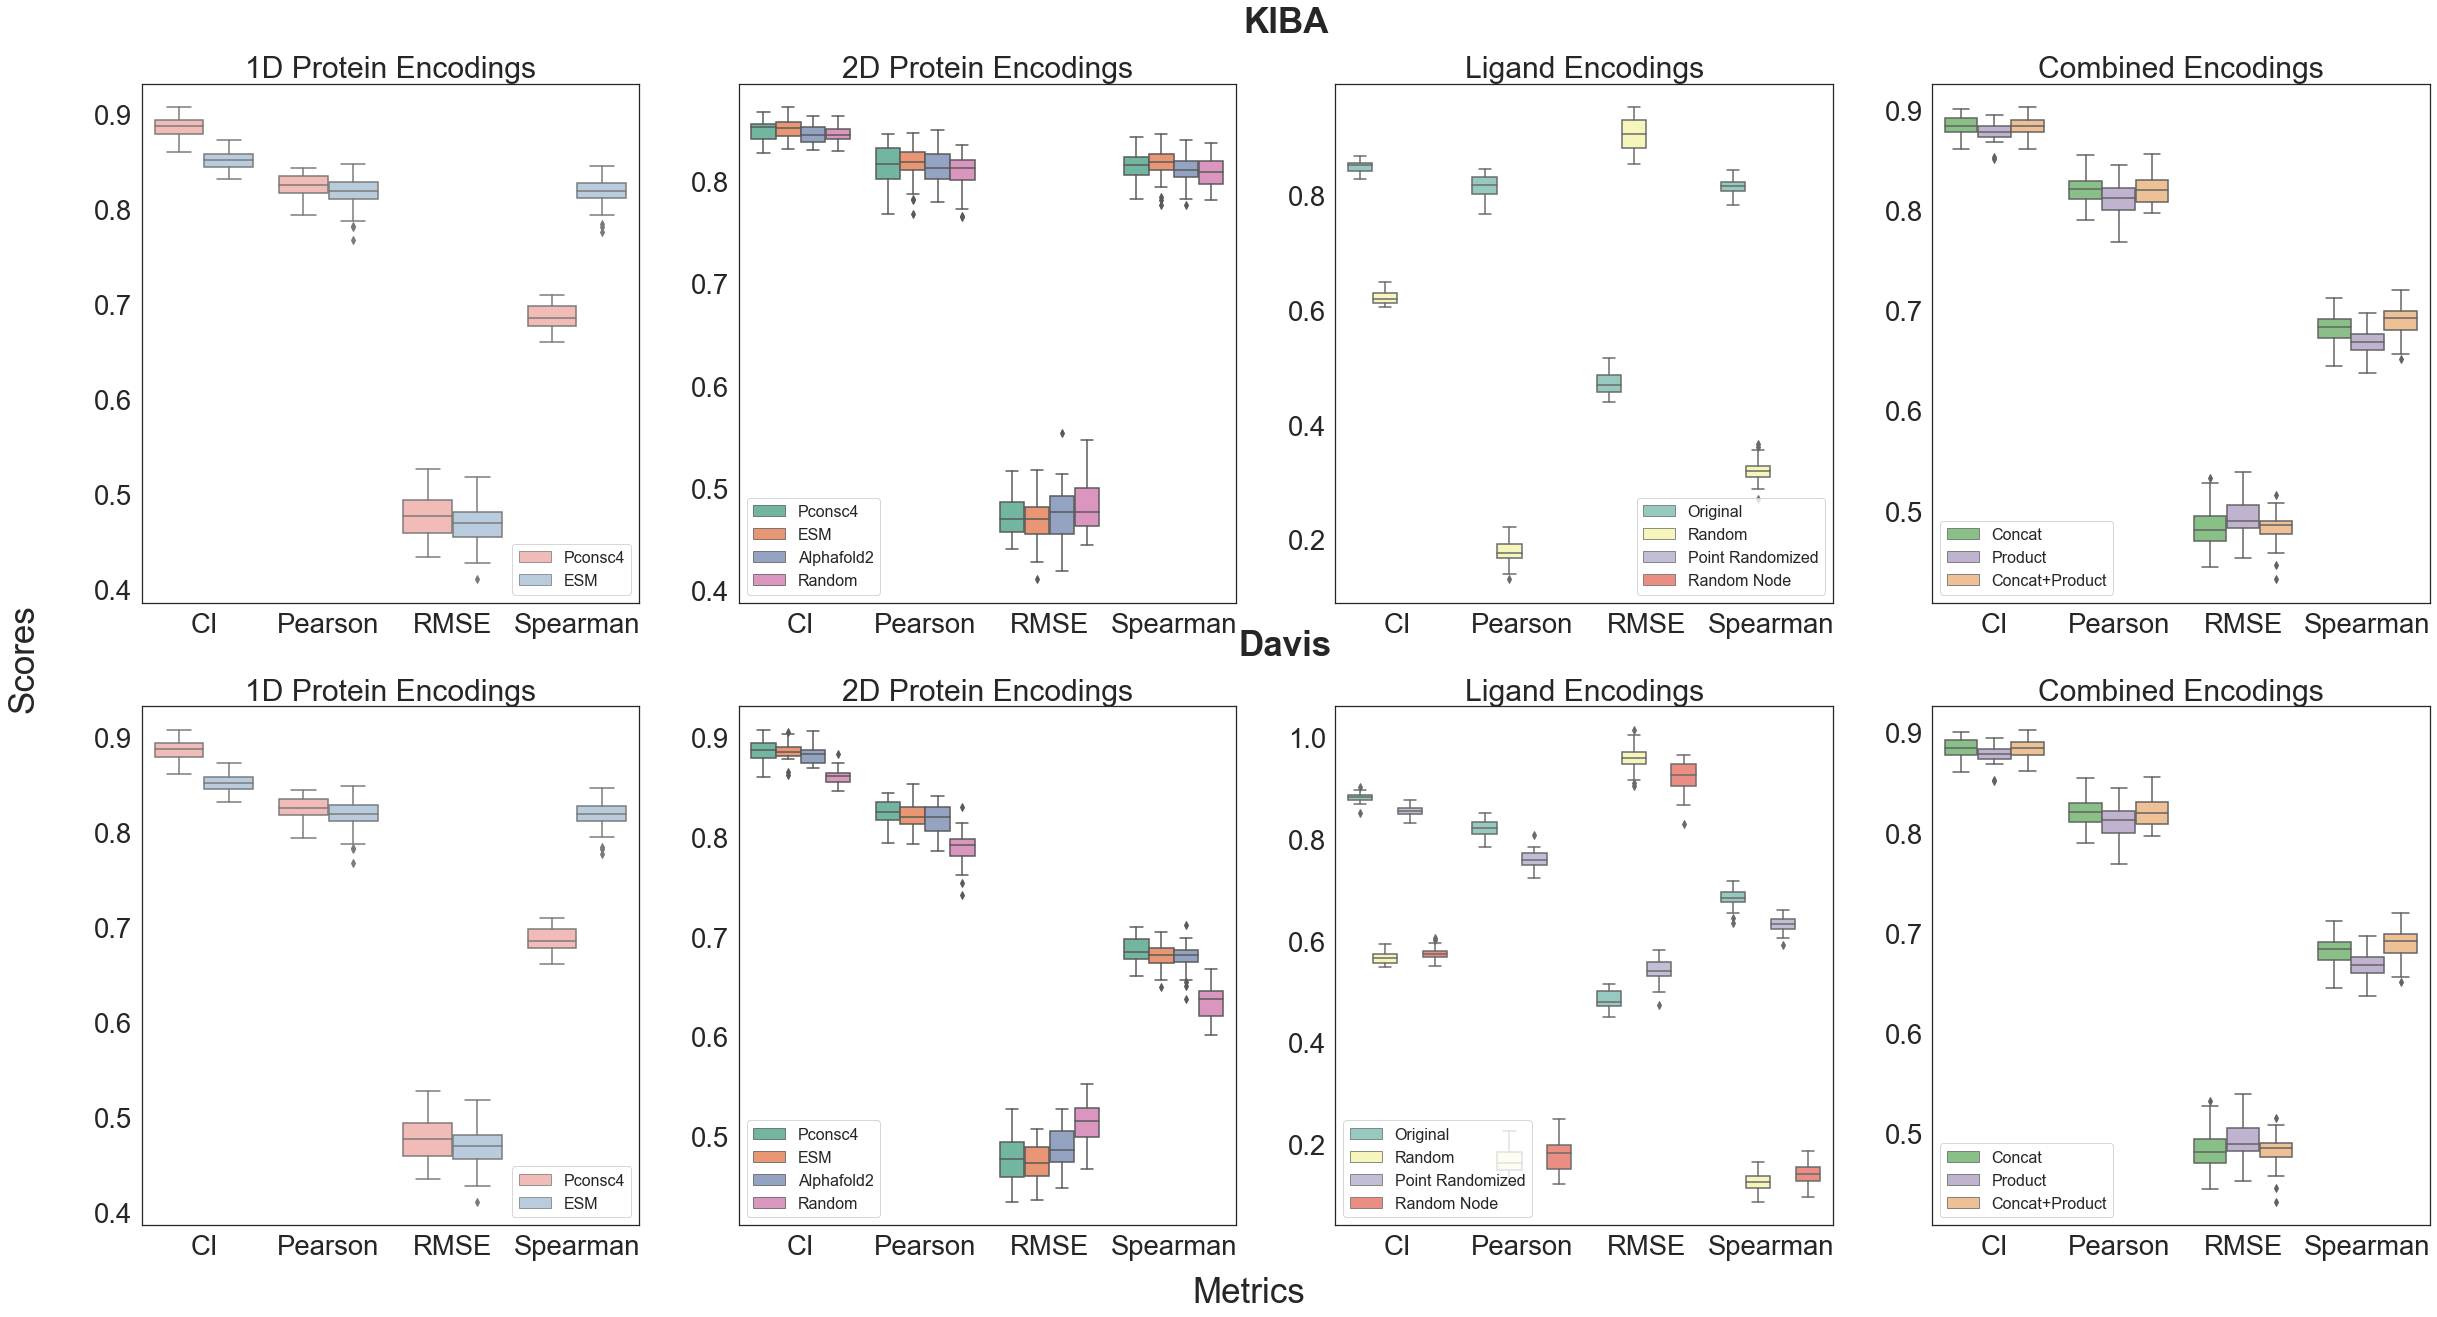

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(41,21))
adjust_box_widths(fig, 1.2)
grid = plt.GridSpec(2, 4)
order = ["CI", "Pearson",'RMSE','Spearman']
#fig.suptitle('Initial')

### KIBA Data
create_subtitle(fig, grid[0, ::], 'KIBA')
hue_order1=['Pconsc4','ESM']
sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[0][0].set_title("1D Protein Encodings")
# axes[0][0].set_xlabel('Metrics',fontsize=35)
# axes[0][0].set_ylabel('Scores',fontsize=35)
axes[0][0].set_xlabel('',fontsize=25)
axes[0][0].set_ylabel('',fontsize=25)
axes[0][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

hue_order2=['Pconsc4','ESM','Alphafold2','Random']
sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order2)
axes[0][1].set_title("2D Protein Encodings")
axes[0][1].set_xlabel('',fontsize=25)
axes[0][1].set_ylabel('',fontsize=25)
axes[0][1].legend(loc='lower left',fontsize=16)

hue_order3=['Original','Random','Point Randomized', 'Random Node']
sns.boxplot(ax=axes[0][2],x='variable', y='value',hue='Encoding', data=df_melted2, order=order,palette="Set3",  hue_order=hue_order3)
axes[0][2].set_title("Ligand Encodings")
axes[0][2].set_xlabel('',fontsize=25)
axes[0][2].set_ylabel('',fontsize=25)
axes[0][2].legend(loc='lower right',fontsize=16)
hue_order4=['Concat','Product','Concat+Product']
sns.boxplot(ax=axes[0][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[0][3].set_title("Combined Encodings")
axes[0][3].set_xlabel('',fontsize=25)
axes[0][3].set_ylabel('',fontsize=25)
axes[0][3].legend(loc='lower left',fontsize=16)

# Davis Data
create_subtitle(fig, grid[1, ::], 'Davis')
sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[1][0].set_title("1D Protein Encodings")
axes[1][0].set_xlabel('',fontsize=25)
axes[1][0].set_ylabel('',fontsize=25)
axes[1][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='cmap', data=df_melted7, order=order,palette="Set2",  hue_order=hue_order2)
axes[1][1].set_title("2D Protein Encodings")
axes[1][1].set_xlabel('',fontsize=25)
axes[1][1].set_ylabel('',fontsize=25)
axes[1][1].legend(loc='lower left',fontsize=16)

#hue_order5=['Original Ligand Graph','Random Ligand Graph','Point Randomization Ligand Graph', 'Random Node Ligand Graph']
sns.boxplot(ax=axes[1][2],x='variable', y='value',hue='Encoding', data=df_melted4, order=order,palette="Set3",  hue_order=hue_order3)
axes[1][2].set_title("Ligand Encodings")
axes[1][2].set_xlabel('',fontsize=25)
axes[1][2].set_ylabel('',fontsize=25)
axes[1][2].legend(loc='lower left',fontsize=16)

sns.boxplot(ax=axes[1][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[1][3].set_title("Combined Encodings")
axes[1][3].set_xlabel('',fontsize=25)
axes[1][3].set_ylabel('',fontsize=25)
axes[1][3].legend(loc='lower left',fontsize=16)
# fig.tight_layout(h_pad=1)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)

fig.supxlabel('Metrics',fontsize=35,y=0.08,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.085,ha='center',va='center')

# fig.supxlabel('u Velocity (m/s)')
# fig.supylabel('y Distance (cm)')

fig.savefig(os.path.join('results_plots',  'Fig4' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig4' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig4' + '.svg'), dpi=500, bbox_inches='tight')



In [ ]:
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='bold',fontsize=35,ha='center',va='bottom')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

fig, axes = plt.subplots(2, 4, figsize=(41,21))
adjust_box_widths(fig, 1.2)
grid = plt.GridSpec(2, 4)
order = ["CI", "Pearson",'RMSE','Spearman']
#fig.suptitle('Initial')

### KIBA Data
create_subtitle(fig, grid[0, ::], 'KIBA')
hue_order1=['Pconsc4','ESM']
sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[0][0].set_title("1D Protein Encodings")
# axes[0][0].set_xlabel('Metrics',fontsize=35)
# axes[0][0].set_ylabel('Scores',fontsize=35)
axes[0][0].set_xlabel('',fontsize=25)
axes[0][0].set_ylabel('',fontsize=25)
axes[0][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

hue_order2=['Pconsc4','ESM','Alphafold2','Random']
sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order2)
axes[0][1].set_title("2D Protein Encodings")
axes[0][1].set_xlabel('',fontsize=25)
axes[0][1].set_ylabel('',fontsize=25)
axes[0][1].legend(loc='lower left',fontsize=16)

hue_order3=['Original','Random','Point Randomized', 'Random Node']
sns.boxplot(ax=axes[0][2],x='variable', y='value',hue='Encoding', data=df_melted2, order=order,palette="Set3",  hue_order=hue_order3)
axes[0][2].set_title("Ligand Encodings")
axes[0][2].set_xlabel('',fontsize=25)
axes[0][2].set_ylabel('',fontsize=25)
axes[0][2].legend(loc='lower right',fontsize=16)
hue_order4=['Concat','Product','Concat+Product']
sns.boxplot(ax=axes[0][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[0][3].set_title("Combined Encodings")
axes[0][3].set_xlabel('',fontsize=25)
axes[0][3].set_ylabel('',fontsize=25)
axes[0][3].legend(loc='lower left',fontsize=16)

# Davis Data
create_subtitle(fig, grid[1, ::], 'Davis')
sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[1][0].set_title("1D Protein Encodings")
axes[1][0].set_xlabel('',fontsize=25)
axes[1][0].set_ylabel('',fontsize=25)
axes[1][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='cmap', data=df_melted7, order=order,palette="Set2",  hue_order=hue_order2)
axes[1][1].set_title("2D Protein Encodings")
axes[1][1].set_xlabel('',fontsize=25)
axes[1][1].set_ylabel('',fontsize=25)
axes[1][1].legend(loc='lower left',fontsize=16)

#hue_order5=['Original Ligand Graph','Random Ligand Graph','Point Randomization Ligand Graph', 'Random Node Ligand Graph']
sns.boxplot(ax=axes[1][2],x='variable', y='value',hue='Encoding', data=df_melted4, order=order,palette="Set3",  hue_order=hue_order3)
axes[1][2].set_title("Ligand Encodings")
axes[1][2].set_xlabel('',fontsize=25)
axes[1][2].set_ylabel('',fontsize=25)
axes[1][2].legend(loc='lower left',fontsize=16)

sns.boxplot(ax=axes[1][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[1][3].set_title("Combined Encodings")
axes[1][3].set_xlabel('',fontsize=25)
axes[1][3].set_ylabel('',fontsize=25)
axes[1][3].legend(loc='lower left',fontsize=16)
# fig.tight_layout(h_pad=1)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)

fig.supxlabel('Metrics',fontsize=35,y=0.08,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.085,ha='center',va='center')

# fig.supxlabel('u Velocity (m/s)')
# fig.supylabel('y Distance (cm)')

fig.savefig(os.path.join('results_plots',  'Fig4' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig4' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig4' + '.svg'), dpi=500, bbox_inches='tight')



Text(0.085, 0.5, 'Scores')

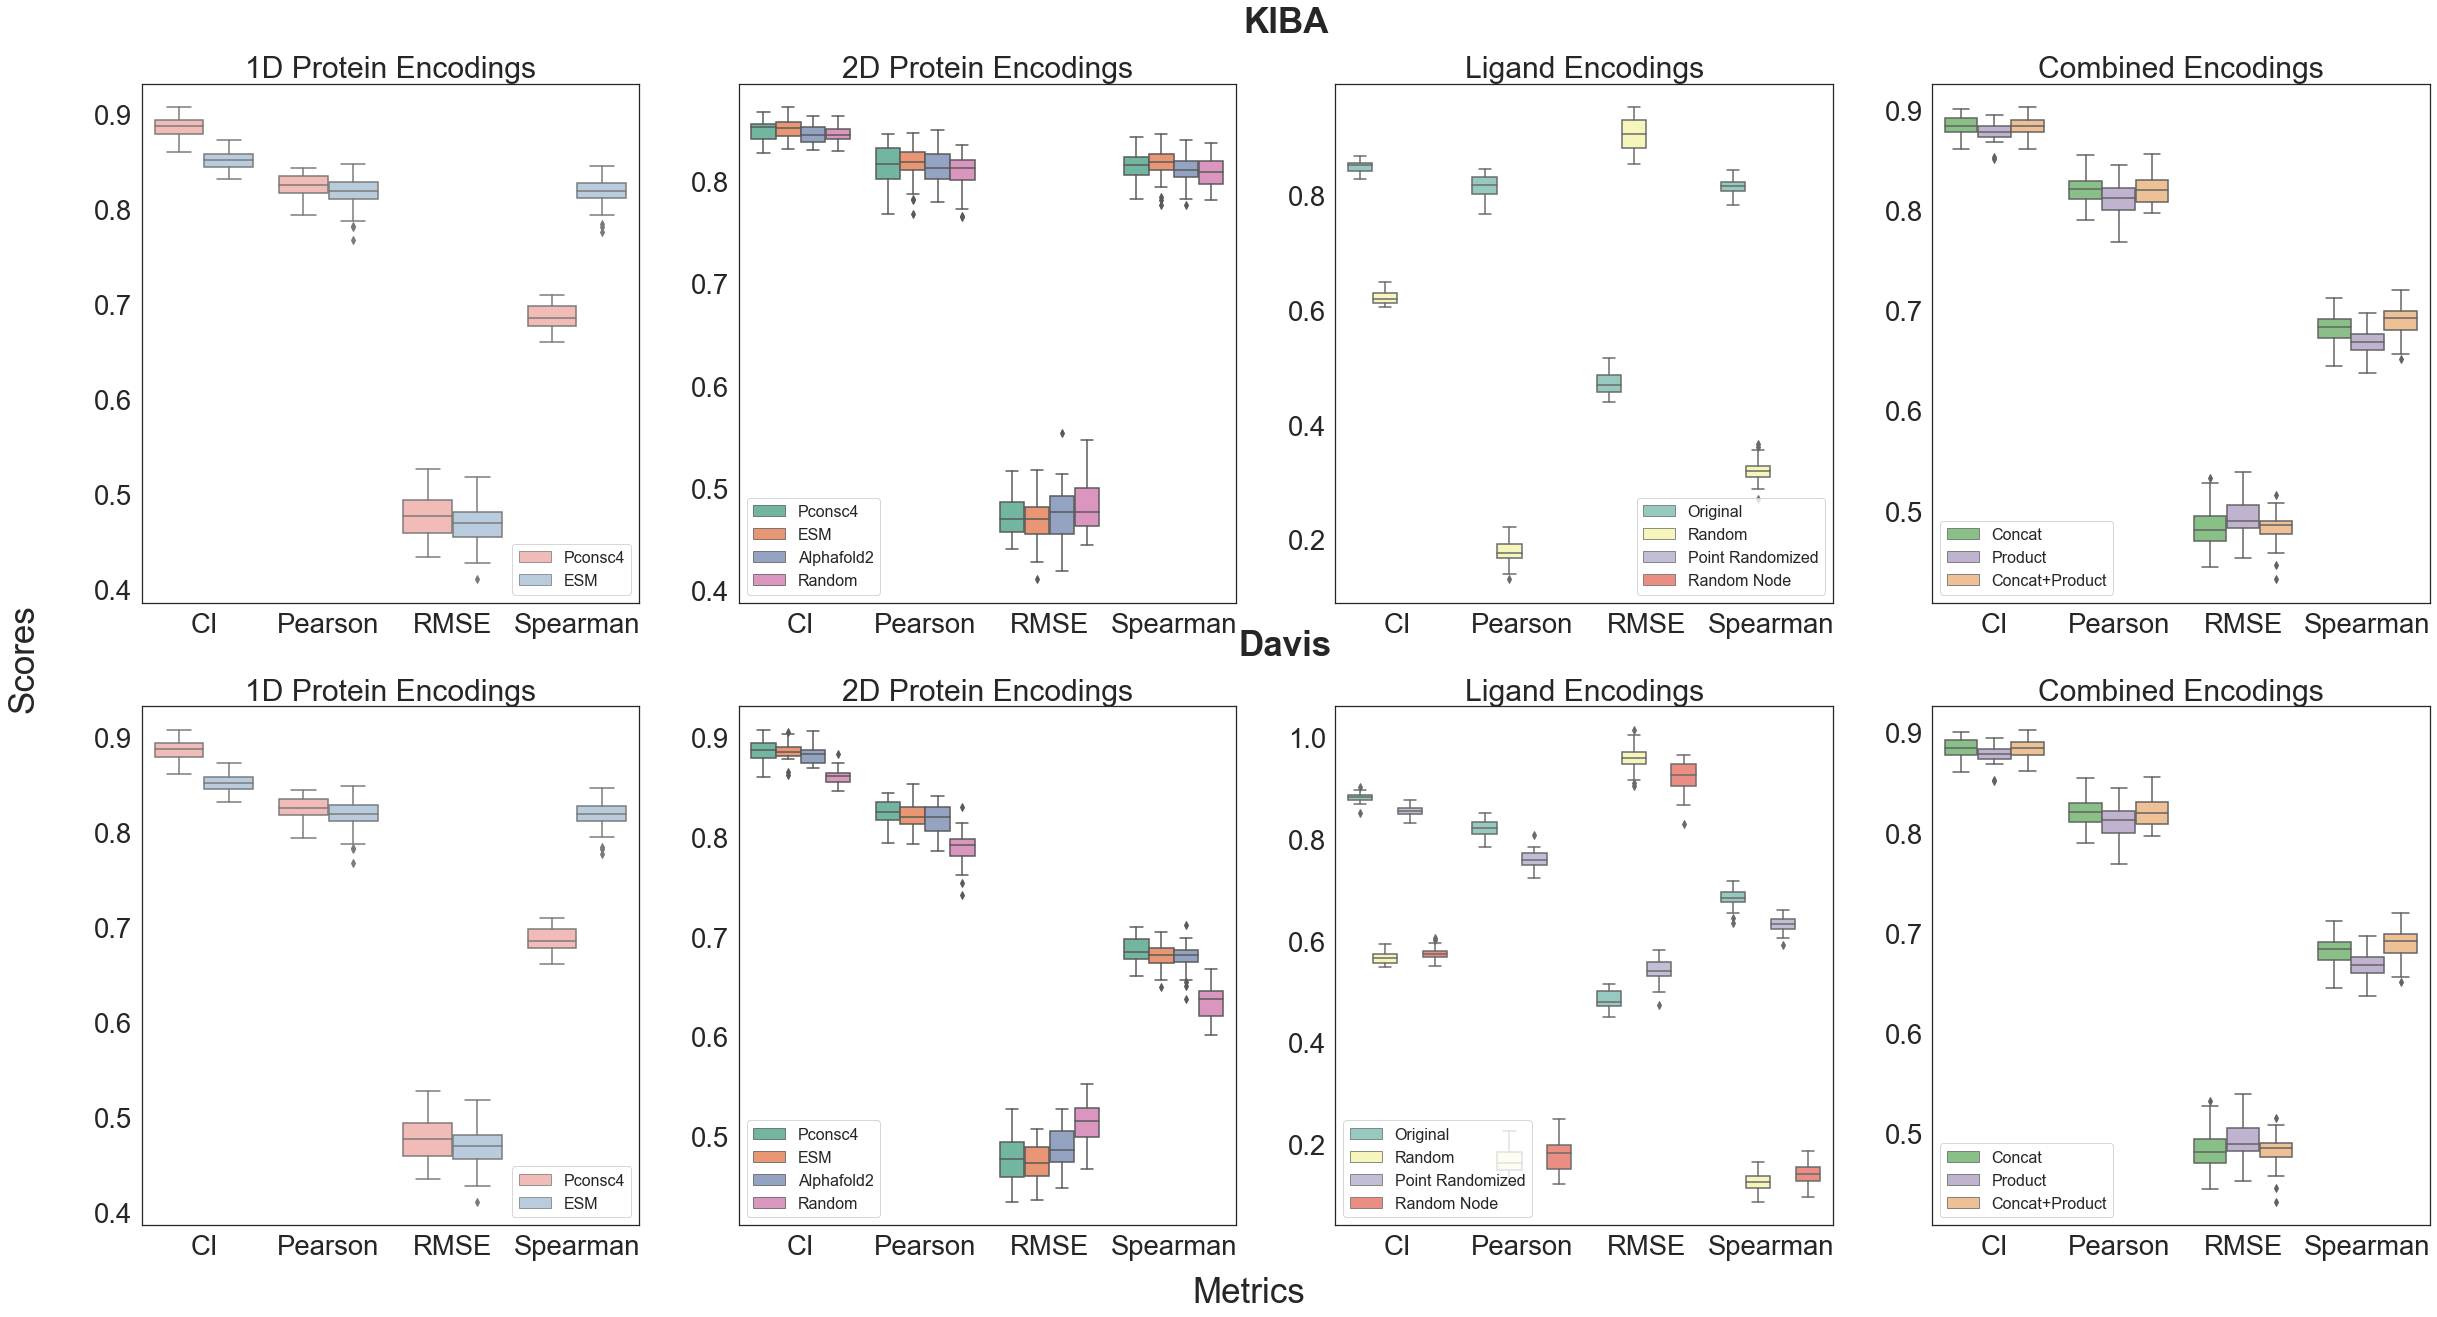

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(41,21))
#adjust_box_widths(fig, 1.2)
grid = plt.GridSpec(2, 4)
order = ["CI", "Pearson",'RMSE','Spearman']
#fig.suptitle('Initial')

### KIBA Data
create_subtitle(fig, grid[0, ::], 'KIBA')
hue_order1=['Pconsc4','ESM']
sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[0][0].set_title("1D Protein Encodings")
# axes[0][0].set_xlabel('Metrics',fontsize=35)
# axes[0][0].set_ylabel('Scores',fontsize=35)
axes[0][0].set_xlabel('',fontsize=25)
axes[0][0].set_ylabel('',fontsize=25)
axes[0][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

hue_order2=['Pconsc4','ESM','Alphafold2','Random']
sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order2)
axes[0][1].set_title("2D Protein Encodings")
axes[0][1].set_xlabel('',fontsize=25)
axes[0][1].set_ylabel('',fontsize=25)
axes[0][1].legend(loc='lower left',fontsize=16)

hue_order3=['Original','Random','Point Randomized', 'Random Node']
sns.boxplot(ax=axes[0][2],x='variable', y='value',hue='Encoding', data=df_melted2, order=order,palette="Set3",  hue_order=hue_order3)
axes[0][2].set_title("Ligand Encodings")
axes[0][2].set_xlabel('',fontsize=25)
axes[0][2].set_ylabel('',fontsize=25)
axes[0][2].legend(loc='lower right',fontsize=16)
hue_order4=['Concat','Product','Concat+Product']
sns.boxplot(ax=axes[0][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[0][3].set_title("Combined Encodings")
axes[0][3].set_xlabel('',fontsize=25)
axes[0][3].set_ylabel('',fontsize=25)
axes[0][3].legend(loc='lower left',fontsize=16)

# Davis Data
create_subtitle(fig, grid[1, ::], 'Davis')
sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[1][0].set_title("1D Protein Encodings")
axes[1][0].set_xlabel('',fontsize=25)
axes[1][0].set_ylabel('',fontsize=25)
axes[1][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='cmap', data=df_melted7, order=order,palette="Set2",  hue_order=hue_order2)
axes[1][1].set_title("2D Protein Encodings")
axes[1][1].set_xlabel('',fontsize=25)
axes[1][1].set_ylabel('',fontsize=25)
axes[1][1].legend(loc='lower left',fontsize=16)

#hue_order5=['Original Ligand Graph','Random Ligand Graph','Point Randomization Ligand Graph', 'Random Node Ligand Graph']
sns.boxplot(ax=axes[1][2],x='variable', y='value',hue='Encoding', data=df_melted4, order=order,palette="Set3",  hue_order=hue_order3)
axes[1][2].set_title("Ligand Encodings")
axes[1][2].set_xlabel('',fontsize=25)
axes[1][2].set_ylabel('',fontsize=25)
axes[1][2].legend(loc='lower left',fontsize=16)

sns.boxplot(ax=axes[1][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[1][3].set_title("Combined Encodings")
axes[1][3].set_xlabel('',fontsize=25)
axes[1][3].set_ylabel('',fontsize=25)
axes[1][3].legend(loc='lower left',fontsize=16)

fig.supxlabel('Metrics',fontsize=35,y=0.08,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.085,ha='center',va='center')



# fig.savefig(os.path.join('results_plots',  'Fig4' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'Fig4' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'Fig4' + '.svg'), dpi=500, bbox_inches='tight')



In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(41,21))

grid = plt.GridSpec(2, 4)
order = ["CI", "Pearson",'RMSE','Spearman']


# KIBA Data
create_subtitle(fig, grid[0, ::], 'KIBA')
hue_order1=['Pconsc4','ESM']
sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[0][0].set_title("1D Protein Encodings")
axes[0][0].set_xlabel('',fontsize=25)
axes[0][0].set_ylabel('',fontsize=25)
axes[0][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

hue_order2=['Pconsc4','ESM','Alphafold2','Random']
sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order2)
axes[0][1].set_title("2D Protein Encodings")
axes[0][1].set_xlabel('',fontsize=25)
axes[0][1].set_ylabel('',fontsize=25)
axes[0][1].legend(loc='lower left',fontsize=16)

hue_order3=['Original','Random','Point Randomized', 'Random Node']
sns.boxplot(ax=axes[0][2],x='variable', y='value',hue='Encoding', data=df_melted2, order=order,palette="Set3",  hue_order=hue_order3)
axes[0][2].set_title("Ligand Encodings")
axes[0][2].set_xlabel('',fontsize=25)
axes[0][2].set_ylabel('',fontsize=25)
axes[0][2].legend(loc='lower right',fontsize=16)
hue_order4=['Concat','Product','Concat+Product']
sns.boxplot(ax=axes[0][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[0][3].set_title("Combined Encodings")
axes[0][3].set_xlabel('',fontsize=25)
axes[0][3].set_ylabel('',fontsize=25)
axes[0][3].legend(loc='lower left',fontsize=16)

# Davis Data
create_subtitle(fig, grid[1, ::], 'Davis')
sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[1][0].set_title("1D Protein Encodings")
axes[1][0].set_xlabel('',fontsize=25)
axes[1][0].set_ylabel('',fontsize=25)
axes[1][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='cmap', data=df_melted7, order=order,palette="Set2",  hue_order=hue_order2)
axes[1][1].set_title("2D Protein Encodings")
axes[1][1].set_xlabel('',fontsize=25)
axes[1][1].set_ylabel('',fontsize=25)
axes[1][1].legend(loc='lower left',fontsize=16)

#hue_order5=['Original Ligand Graph','Random Ligand Graph','Point Randomization Ligand Graph', 'Random Node Ligand Graph']
sns.boxplot(ax=axes[1][2],x='variable', y='value',hue='Encoding', data=df_melted4, order=order,palette="Set3",  hue_order=hue_order3)
axes[1][2].set_title("Ligand Encodings")
axes[1][2].set_xlabel('',fontsize=25)
axes[1][2].set_ylabel('',fontsize=25)
axes[1][2].legend(loc='lower left',fontsize=16)

sns.boxplot(ax=axes[1][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[1][3].set_title("Combined Encodings")
axes[1][3].set_xlabel('',fontsize=25)
axes[1][3].set_ylabel('',fontsize=25)
axes[1][3].legend(loc='lower left',fontsize=16)

fig.supxlabel('Metrics',fontsize=35,y=0.08,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.085,ha='center',va='center')






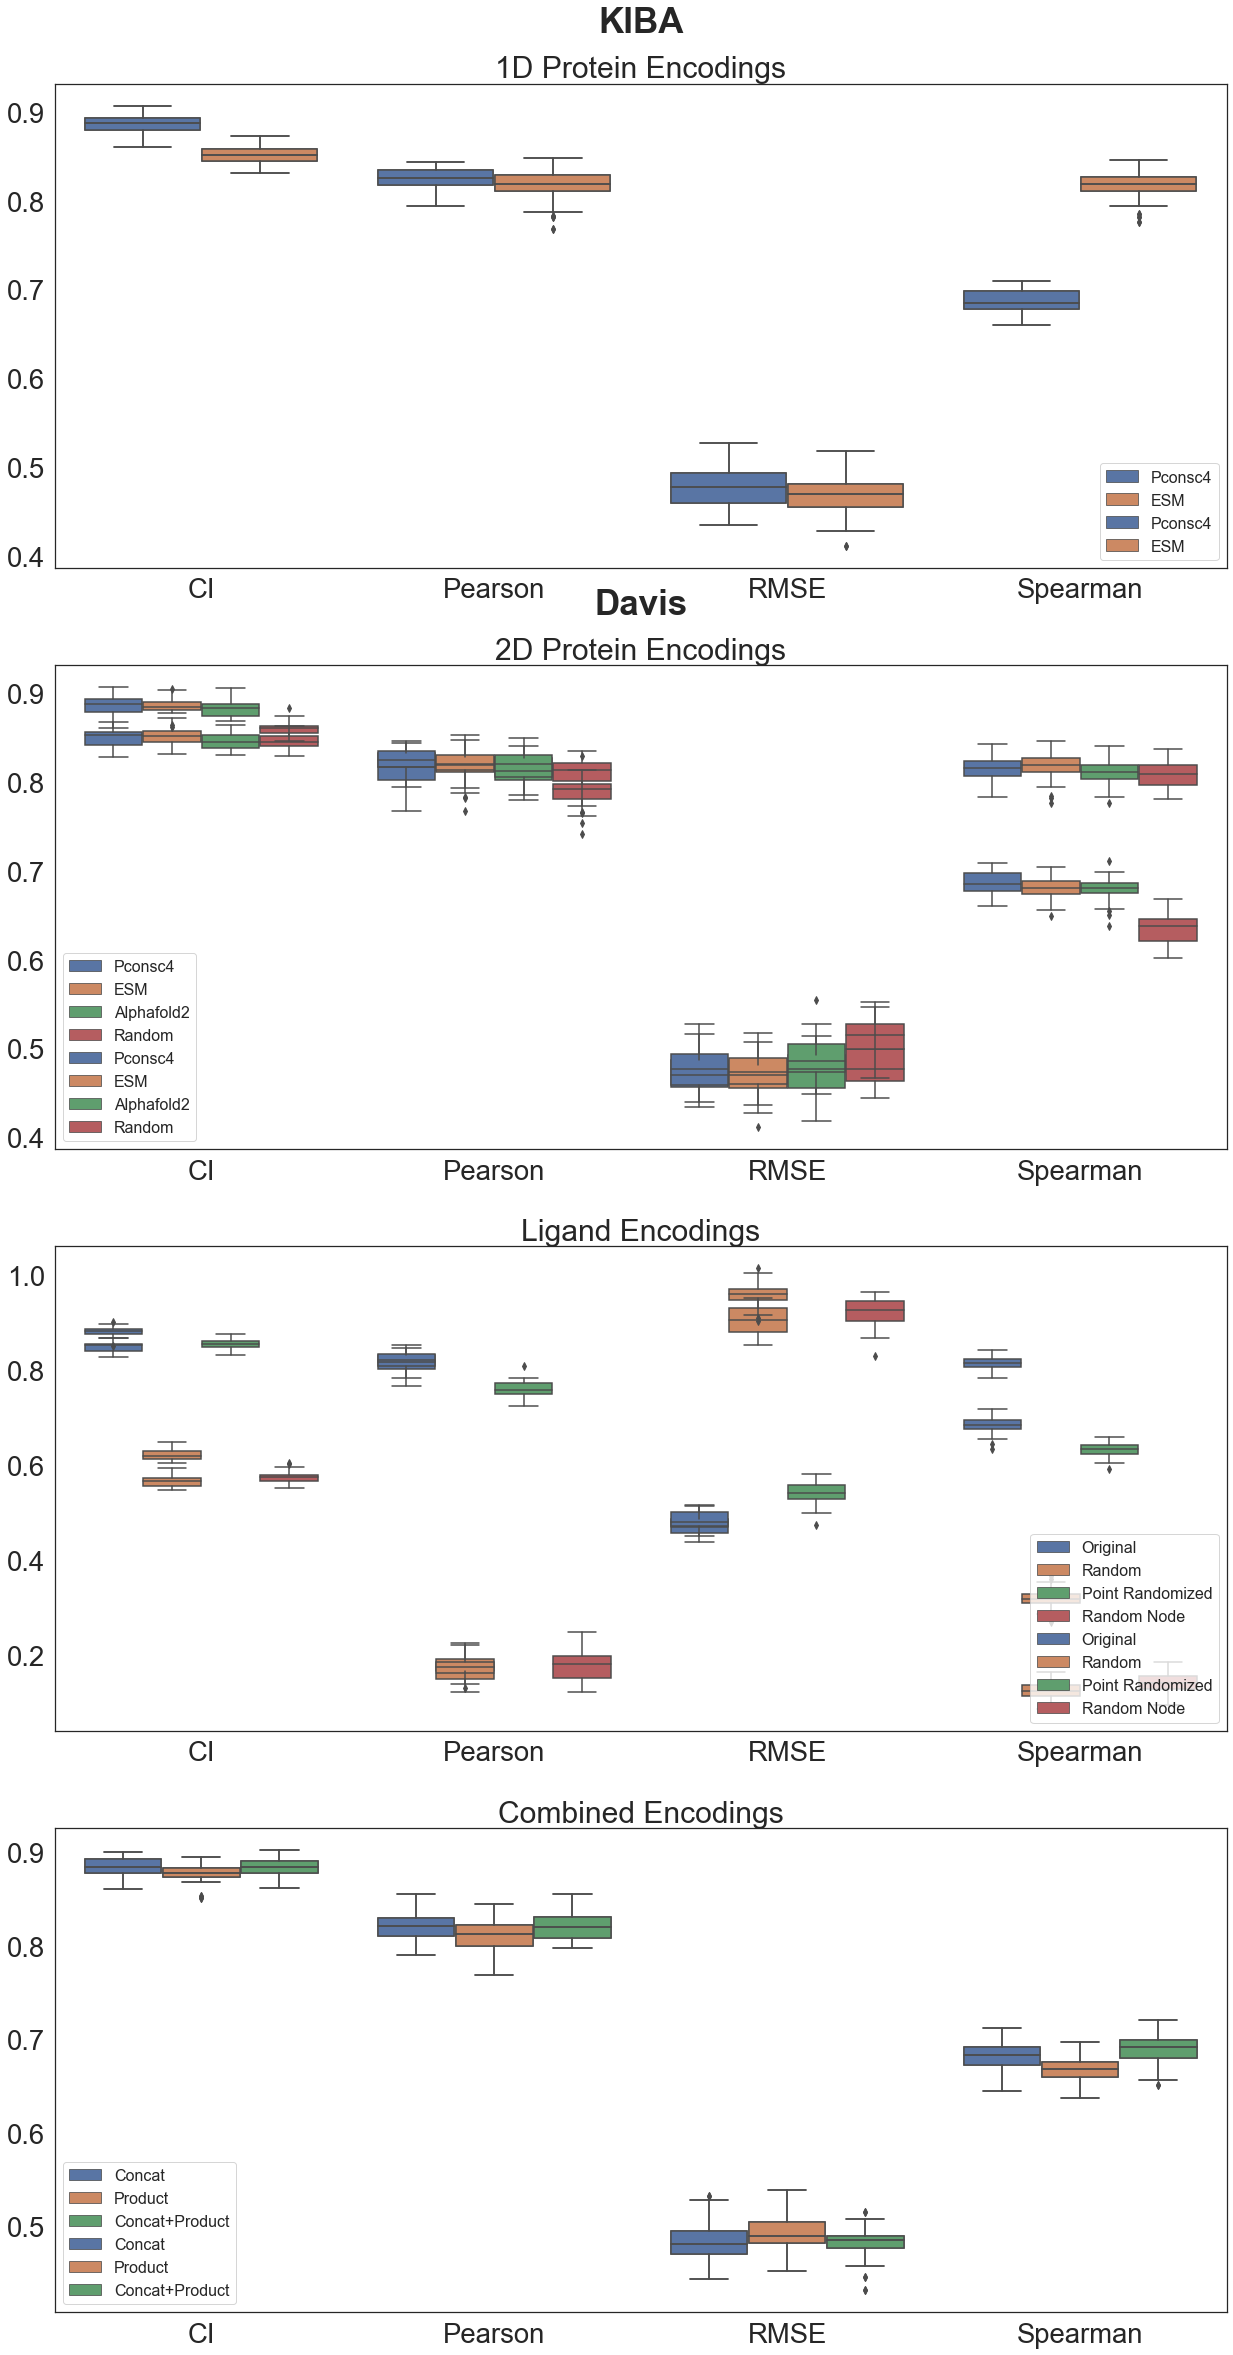

In [10]:
fig, axes = plt.subplots(4, 1, figsize=(21, 41))

grid = plt.GridSpec(4, 1)
order = ["CI", "Pearson",'RMSE','Spearman']

# KIBA Data
create_subtitle(fig, grid[0], 'KIBA')
hue_order1=['Pconsc4','ESM']
sns.boxplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6, order=order, palette=["C0", "C1"], hue_order=hue_order1)
axes[0].set_title("1D Protein Encodings")
axes[0].set_xlabel('', fontsize=25)
axes[0].set_ylabel('', fontsize=25)
axes[0].legend(loc='lower right', fontsize=16)

hue_order2=['Pconsc4','ESM','Alphafold2','Random']
sns.boxplot(ax=axes[1], x='variable', y='value', hue='cmap', data=df_melted1, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order2)
axes[1].set_title("2D Protein Encodings")
axes[1].set_xlabel('', fontsize=25)
axes[1].set_ylabel('', fontsize=25)
axes[1].legend(loc='lower left', fontsize=16)

hue_order3=['Original','Random','Point Randomized', 'Random Node']
sns.boxplot(ax=axes[2], x='variable', y='value', hue='Encoding', data=df_melted2, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order3)
axes[2].set_title("Ligand Encodings")
axes[2].set_xlabel('', fontsize=25)
axes[2].set_ylabel('', fontsize=25)
axes[2].legend(loc='lower right', fontsize=16)

hue_order4=['Concat','Product','Concat+Product']
sns.boxplot(ax=axes[3], x='variable', y='value', hue='Encoding', data=df_melted5, order=order, palette=["C0", "C1", "C2"], hue_order=hue_order4)
axes[3].set_title("Combined Encodings")
axes[3].set_xlabel('', fontsize=25)
axes[3].set_ylabel('', fontsize=25)
axes[3].legend(loc='lower left', fontsize=16)

# Davis Data
create_subtitle(fig, grid[1], 'Davis')
sns.boxplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6, order=order, palette=["C0", "C1"], hue_order=hue_order1)
axes[0].set_title("1D Protein Encodings")
axes[0].set_xlabel('', fontsize=25)
axes[0].set_ylabel('', fontsize=25)
axes[0].legend(loc='lower right', fontsize=16)

sns.boxplot(ax=axes[1], x='variable', y='value', hue='cmap', data=df_melted7, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order2)
axes[1].set_title("2D Protein Encodings")
axes[1].set_xlabel('', fontsize=25)
axes[1].set_ylabel('', fontsize=25)
axes[1].legend(loc='lower left', fontsize=16)

sns.boxplot(ax=axes[2], x='variable', y='value', hue='Encoding', data=df_melted4, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order3)
axes[2].set_title("Ligand Encodings")
axes[2].set_xlabel('', fontsize=25)
axes[2].set_ylabel('', fontsize=25)
axes[2].legend(loc='lower right', fontsize=16)

hue_order4=['Concat','Product','Concat+Product']
sns.boxplot(ax=axes[3], x='variable', y='value', hue='Encoding', data=df_melted5, order=order, palette=["C0", "C1", "C2"], hue_order=hue_order4)
axes[3].set_title("Combined Encodings")
axes[3].set_xlabel('', fontsize=25)
axes[3].set_ylabel('', fontsize=25)
axes[3].legend(loc='lower left', fontsize=16)

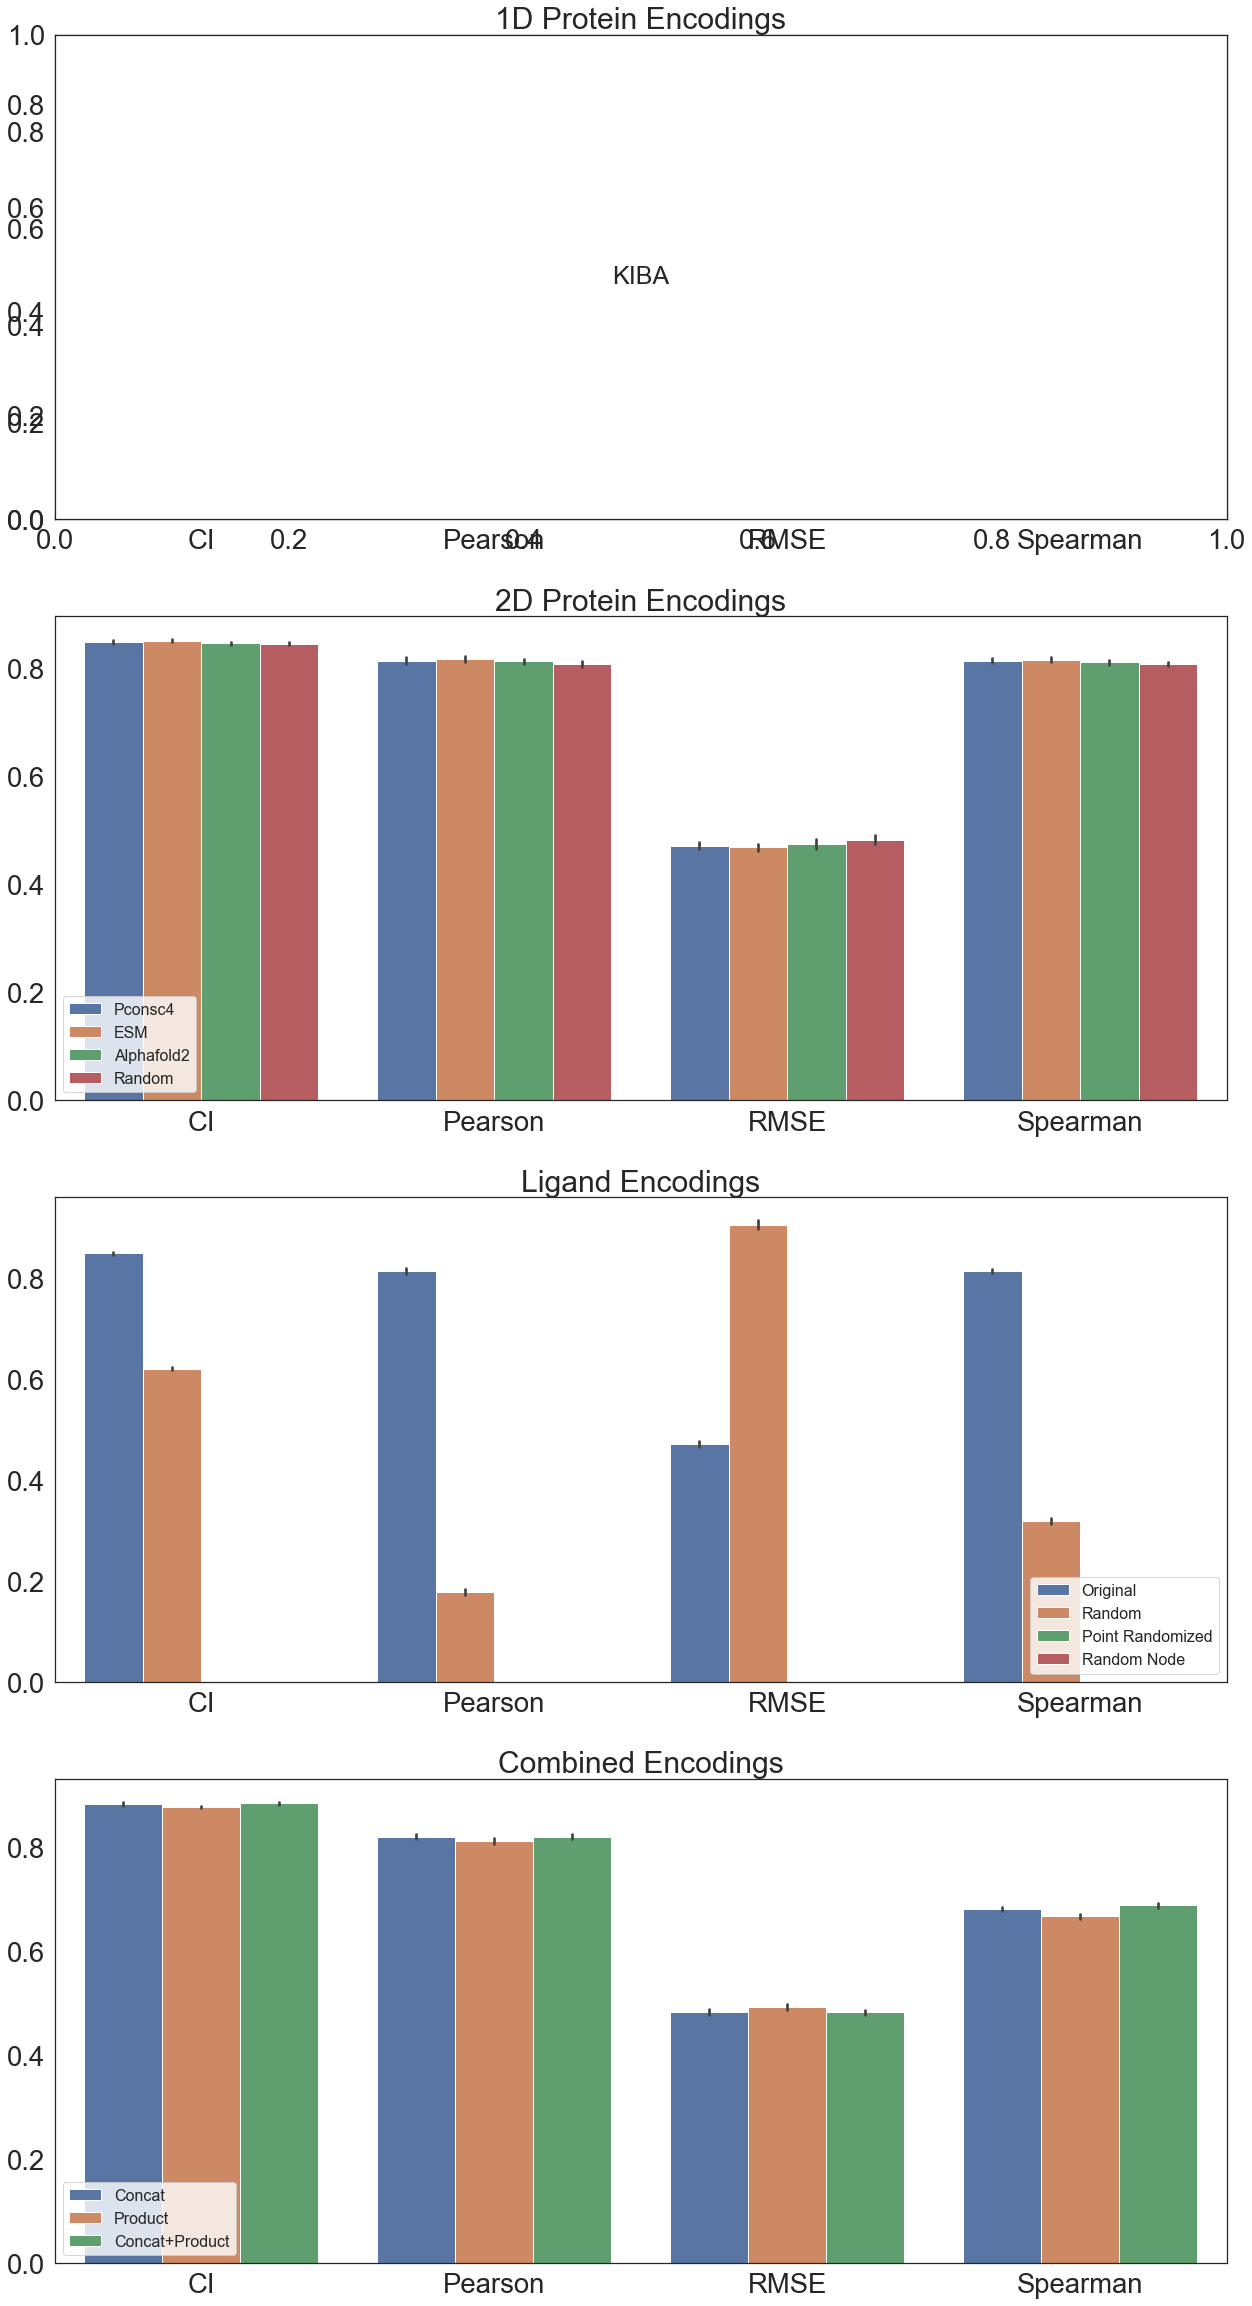

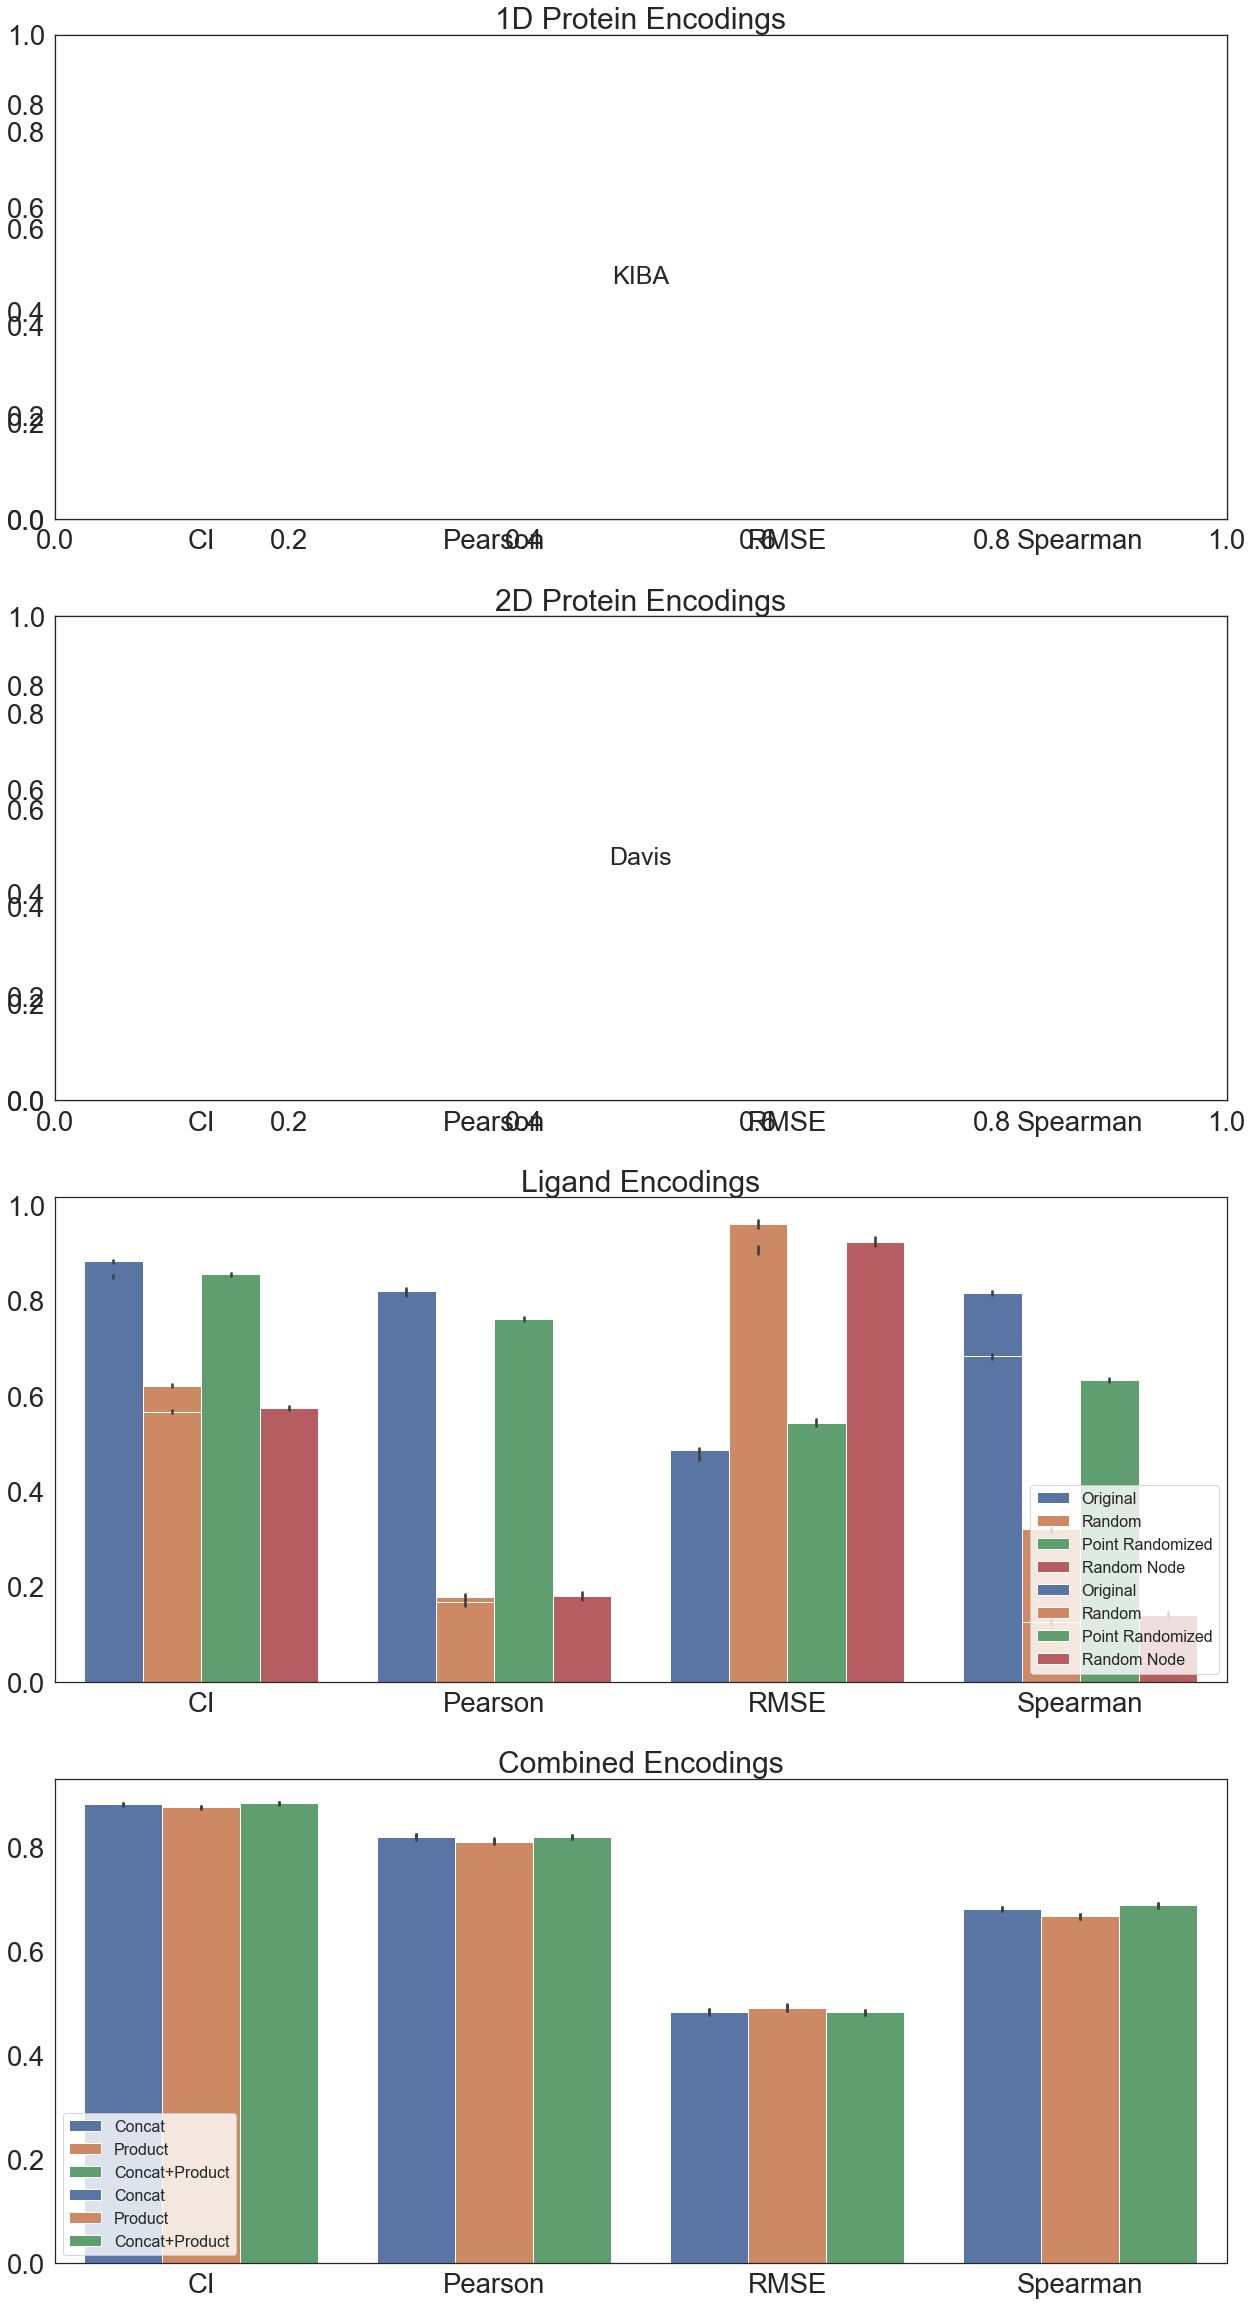

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # Load data
# df_melted1 = pd.read_csv('data1.csv')
# df_melted2 = pd.read_csv('data2.csv')
# df_melted3 = pd.read_csv('data3.csv')
# df_melted4 = pd.read_csv('data4.csv')
# df_melted5 = pd.read_csv('data5.csv')
# df_melted6 = pd.read_csv('data6.csv')
# df_melted7 = pd.read_csv('data7.csv')

# Define function to add subtitles to each axes
def create_subtitle(fig, position, text):
    fig.add_subplot(position)
    plt.text(0.5, 0.5, text, ha='center', va='center', fontsize=25)

# Define figure and axes
fig, axes = plt.subplots(4, 1, figsize=(21, 41))

# Define x-tick labels and order
order = ["CI", "Pearson",'RMSE','Spearman']

# Define hue orders for each axes
hue_order1=['Pconsc4','ESM']
hue_order2=['Pconsc4','ESM','Alphafold2','Random']
hue_order3=['Original','Random','Point Randomized', 'Random Node']
hue_order4=['Concat','Product','Concat+Product']

# Define color palette for each encoding
palette1=["C0", "C1"]
palette2=["C0", "C1", "C2", "C3"]
palette3=["C0", "C1", "C2", "C3"]
palette4=["C0", "C1", "C2"]

# KIBA Data
create_subtitle(fig, 411, 'KIBA')
sns.barplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6, order=order, palette=palette1, hue_order=hue_order1)
axes[0].set_title("1D Protein Encodings")
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].legend(loc='lower right', fontsize=16)

sns.barplot(ax=axes[1], x='variable', y='value', hue='cmap', data=df_melted1, order=order, palette=palette2, hue_order=hue_order2)
axes[1].set_title("2D Protein Encodings")
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].legend(loc='lower left', fontsize=16)

sns.barplot(ax=axes[2], x='variable', y='value', hue='Encoding', data=df_melted2, order=order, palette=palette3, hue_order=hue_order3)
axes[2].set_title("Ligand Encodings")
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].legend(loc='lower right', fontsize=16)

sns.barplot(ax=axes[3], x='variable', y='value', hue='Encoding', data=df_melted5, order=order, palette=palette4, hue_order=hue_order4)
axes[3].set_title("Combined Encodings")
axes[3].set_xlabel('')
axes[3].set_ylabel('')
axes[3].legend(loc='lower left', fontsize=16)

# Davis
fig, axes = plt.subplots(4, 1, figsize=(21, 41))

grid = plt.GridSpec(4, 1)
order = ["CI", "Pearson",'RMSE','Spearman']

# KIBA Data
create_subtitle(fig, grid[0], 'KIBA')
hue_order1=['Pconsc4','ESM']
sns.barplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6, order=order, palette=["C0", "C1"], hue_order=hue_order1)
axes[0].set_title("1D Protein Encodings")
axes[0].set_xlabel('', fontsize=25)
axes[0].set_ylabel('', fontsize=25)
axes[0].legend(loc='lower right', fontsize=16)

hue_order2=['Pconsc4','ESM','Alphafold2','Random']
sns.barplot(ax=axes[1], x='variable', y='value', hue='cmap', data=df_melted1, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order2)
axes[1].set_title("2D Protein Encodings")
axes[1].set_xlabel('', fontsize=25)
axes[1].set_ylabel('', fontsize=25)
axes[1].legend(loc='lower left', fontsize=16)

hue_order3=['Original','Random','Point Randomized', 'Random Node']
sns.barplot(ax=axes[2], x='variable', y='value', hue='Encoding', data=df_melted2, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order3)
axes[2].set_title("Ligand Encodings")
axes[2].set_xlabel('', fontsize=25)
axes[2].set_ylabel('', fontsize=25)
axes[2].legend(loc='lower right', fontsize=16)

hue_order4=['Concat','Product','Concat+Product']
sns.barplot(ax=axes[3], x='variable', y='value', hue='Encoding', data=df_melted5, order=order, palette=["C0", "C1", "C2"], hue_order=hue_order4)
axes[3].set_title("Combined Encodings")
axes[3].set_xlabel('', fontsize=25)
axes[3].set_ylabel('', fontsize=25)
axes[3].legend(loc='lower left', fontsize=16)

# Davis Data
create_subtitle(fig, grid[1], 'Davis')
sns.barplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6, order=order, palette=["C0", "C1"], hue_order=hue_order1)
axes[0].set_title("1D Protein Encodings")
axes[0].set_xlabel('', fontsize=25)
axes[0].set_ylabel('', fontsize=25)
axes[0].legend(loc='lower right', fontsize=16)

sns.barplot(ax=axes[1], x='variable', y='value', hue='cmap', data=df_melted7, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order2)
axes[1].set_title("2D Protein Encodings")
axes[1].set_xlabel('', fontsize=25)
axes[1].set_ylabel('', fontsize=25)
axes[1].legend(loc='lower left', fontsize=16)

sns.barplot(ax=axes[2], x='variable', y='value', hue='Encoding', data=df_melted4, order=order, palette=["C0", "C1", "C2", "C3"], hue_order=hue_order3)
axes[2].set_title("Ligand Encodings")
axes[2].set_xlabel('', fontsize=25)
axes[2].set_ylabel('', fontsize=25)
axes[2].legend(loc='lower right', fontsize=16)

hue_order4=['Concat','Product','Concat+Product']
sns.barplot(ax=axes[3], x='variable', y='value', hue='Encoding', data=df_melted5, order=order, palette=["C0", "C1", "C2"], hue_order=hue_order4)
axes[3].set_title("Combined Encodings")
axes[3].set_xlabel('', fontsize=25)
axes[3].set_ylabel('', fontsize=25)
axes[3].legend(loc='lower left', fontsize=16)

In [54]:
!pip install bokeh

     |████████████████████████████████| 16.5 MB 4.6 MB/s eta 0:00:01████████████████████████▉     | 13.8 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 20.3 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 8.1 MB/s  eta 0:00:01


In [55]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange

# Define the color palette
colors_kiba = ["#4C78A8", "#F58518"]
colors_davis = ["#E45756", "#72B7B2", "#FFD700", "#ADD8E6"]

# Define the order and hue_order for each dataset
order = ["CI", "Pearson", "RMSE", "Spearman"]
hue_order1 = ["Pconsc4", "ESM"]
hue_order2 = ["Pconsc4", "ESM", "Alphafold2", "Random"]
hue_order3 = ["Original", "Random", "Point Randomized", "Random Node"]
hue_order4 = ["Concat", "Product", "Concat+Product"]

# Define the data for each dataset and metric
source_kiba_1D = ColumnDataSource(df_melted6[df_melted6.Dataset == "KIBA"])
source_kiba_2D = ColumnDataSource(df_melted1[df_melted1.Dataset == "KIBA"])
source_kiba_ligand = ColumnDataSource(df_melted2[df_melted2.Dataset == "KIBA"])
source_kiba_combined = ColumnDataSource(df_melted5[df_melted5.Dataset == "KIBA"])
source_davis_1D = ColumnDataSource(df_melted6[df_melted6.Dataset == "Davis"])
source_davis_2D = ColumnDataSource(df_melted7[df_melted7.Dataset == "Davis"])
source_davis_ligand = ColumnDataSource(df_melted4[df_melted4.Dataset == "Davis"])
source_davis_combined = ColumnDataSource(df_melted5[df_melted5.Dataset == "Davis"])

# Create the figures for each dataset and metric
fig_kiba_1D = figure(title="KIBA 1D Protein Encodings", x_range=FactorRange(*order), y_axis_label="", plot_width=800, plot_height=400)
fig_kiba_1D.vbar(x='variable', top='value', width=0.9, alpha=0.7, color='color', legend_field='Encoding', source=source_kiba_1D)
fig_kiba_1D.legend.location = "bottom_right"
fig_kiba_2D = figure(title="KIBA 2D Protein Encodings", x_range=FactorRange(*order), y_axis_label="", plot_width=800, plot_height=400)
fig_kiba_2D.vbar(x='variable', top='value', width=0.2, alpha=0.7, color='color', legend_field='cmap', source=source_kiba_2D)
fig_kiba_2D.legend.location = "bottom_left"
fig_kiba_ligand = figure(title="KIBA Ligand Encodings", x_range=FactorRange(*order), y_axis_label="", plot_width=800, plot_height=400)
fig_kiba_ligand.vbar(x='variable', top='value', width=0.9, alpha=0.7, color='color', legend_field='Encoding', source=source_kiba_ligand)
fig_kiba_ligand.legend.location = "bottom_right"
# fig_kiba_combined = figure(title="KIBA Combined Encodings", x_range=FactorRange(*order), y_axis_label="", plot_width=800, plot_height=400)
# fig_kiba_combined.vbar(x


AttributeError: 'DataFrame' object has no attribute 'Dataset'

In [59]:
from bokeh.core.properties import value
from bokeh.transform import dodge

def box_plot(df, title, palette, hue_order, x, y, hue, width, height):
    p = figure(plot_width=width, plot_height=height, title=title)
    p.xgrid.visible = False
    p.ygrid.visible = False
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y

    # Define the box plot
    box = p.vbar(x=dodge('variable', -0.1, range=p.x_range), top='q3', bottom='q1', width=0.2, fill_color='#3B8686', line_color="black", source=df, legend=value("Q1-Q3"))
    whisker = p.vbar(x=dodge('variable', 0, range=p.x_range), top='upper', bottom='q3', width=0.2, fill_color=None, line_color="black", source=df)
    whisker2 = p.vbar(x=dodge('variable', 0, range=p.x_range), top='q1', bottom='lower', width=0.2, fill_color=None, line_color="black", source=df)

    # Define the legend
    legend = Legend(items=[
        ("Q1-Q3", [box]),
        ("whiskers", [whisker, whisker2])
    ], location="center")

    p.add_layout(legend, 'right')

    # Define the hover tool
    tooltips = [
        (x, "@variable"),
        (y, "@value"),
    ]
    p.add_tools(HoverTool(tooltips=tooltips))

    # Define the groupings for the plot
    groups = df.groupby([hue, 'variable'])
    source = ColumnDataSource(groups)

    # Plot the groups
    p.vbar(x=dodge('variable', -0.1, range=p.x_range), top='value', width=0.2, source=source, color=palette[0], legend=value(hue_order[0]))
    p.vbar(x=dodge('variable', 0.1, range=p.x_range), top='value', width=0.2, source=source, color=palette[1], legend=value(hue_order[1]))

    return p


In [60]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Category10, Category20
from bokeh.transform import factor_cmap

# KIBA Data
source1 = ColumnDataSource(df_melted1)
source2 = ColumnDataSource(df_melted2)
source5 = ColumnDataSource(df_melted5)
source6 = ColumnDataSource(df_melted6)

# Davis Data
source4 = ColumnDataSource(df_melted4)
source7 = ColumnDataSource(df_melted7)

# Set up the figure
p = figure(
    width=800, height=400, x_range=FactorRange(*order), y_range=(0, 3), toolbar_location=None
)

# Add the boxes
p.vbar(
    x=dodge("variable", -0.15, range=p.x_range), top="value", width=0.2, source=source1, color=factor_cmap('Encoding', palette=["#1f77b4", "#ff7f0e"], factors=hue_order1, start=0),
    legend_label='1D Protein Encodings'
)
p.vbar(
    x=dodge("variable",  0.15, range=p.x_range), top="value", width=0.2, source=source2, color=factor_cmap('Encoding', palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], factors=hue_order2, start=0),
    legend_label='2D Protein Encodings'
)
p.vbar(
    x=dodge("variable",  0.45, range=p.x_range), top="value", width=0.2, source=source5, color=factor_cmap('Encoding', palette=["#1f77b4", "#ff7f0e", "#2ca02c"], factors=hue_order4, start=0),
    legend_label='Combined Encodings'
)
p.vbar(
    x=dodge("variable",  0.75, range=p.x_range), top="value", width=0.2, source=source6, color=factor_cmap('Encoding', palette=["#1f77b4", "#ff7f0e"], factors=hue_order1, start=0),
    legend_label='Ligand Encodings'
)

# Add the axes and legend
p.yaxis.axis_label = ''
p.xaxis.axis_label = ''
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.legend.label_text_font_size = "14pt"

# Davis Data
p1 = figure(
    plot_width=800, plot_height=400, x_range=p.x_range, y_range=(0, 3), toolbar_location=None
)

p1.vbar(
    x=dodge("variable", -0.15, range=p1.x_range), top="value", width=0.2, source=source6, color=factor_cmap('Encoding', palette=["#1f77b4", "#ff7f0e"], factors=hue_order1, start=0),
    legend_label='1D Protein Encodings'
)
# p1.vbar(
#     x=dodge("variable",  0.15, range=p1.x_range), top="value", width=0.2, source=source7, color=factor_cmap('cmap', palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],


AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

IndexError: index 2 is out of bounds for axis 1 with size 2

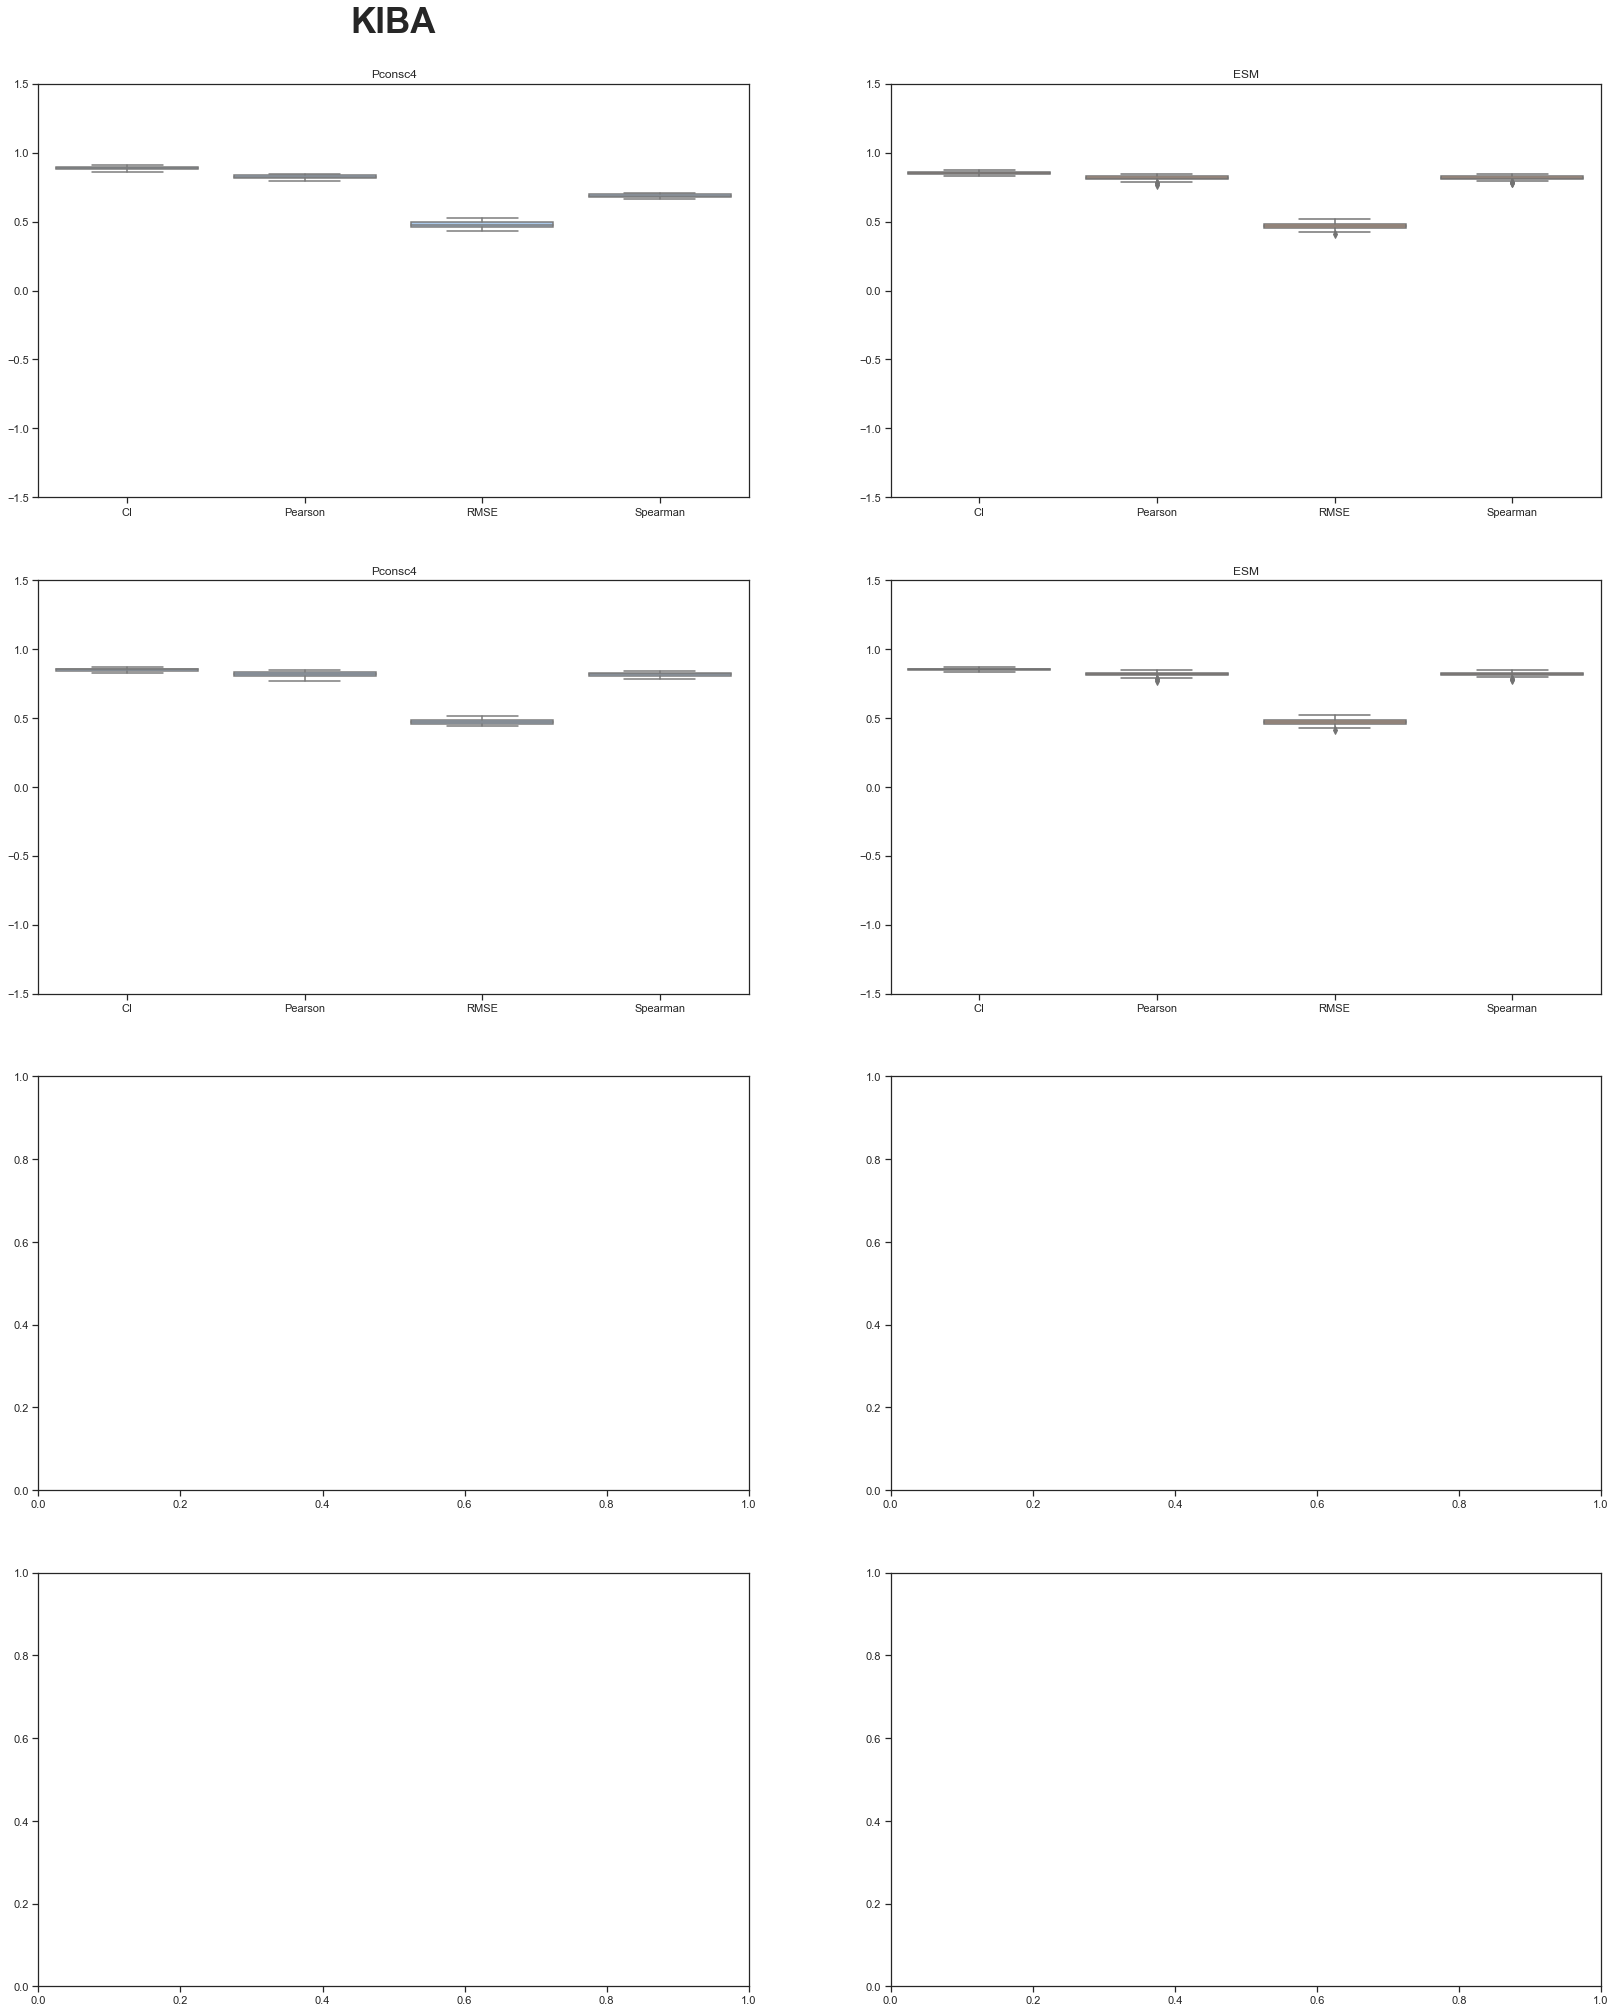

In [51]:
fig, axes = plt.subplots(4, 2, figsize=(28, 35))

grid = plt.GridSpec(4, 2)
order = ["CI", "Pearson", "RMSE", "Spearman"]
colors = ["C0", "C1", "C2", "C3"]

# KIBA Data
create_subtitle(fig, grid[0], 'KIBA')
hue_order1 = ['Pconsc4', 'ESM']
for i, method in enumerate(hue_order1):
    df_temp = df_melted6.loc[df_melted6["Encoding"] == method]
    sns.boxplot(ax=axes[0, i], x='variable', y='value', data=df_temp, order=order, color=colors[i])
    axes[0, i].set_title(method)
    axes[0, i].set_xlabel('', fontsize=25)
    axes[0, i].set_ylabel('', fontsize=25)
    axes[0, i].set_ylim([-1.5, 1.5])

hue_order2 = ['Pconsc4', 'ESM', 'Alphafold2', 'Random']
for i, method in enumerate(hue_order2):
    df_temp = df_melted1.loc[df_melted1["cmap"] == method]
    sns.boxplot(ax=axes[1, i], x='variable', y='value', data=df_temp, order=order, color=colors[i])
    axes[1, i].set_title(method)
    axes[1, i].set_xlabel('', fontsize=25)
    axes[1, i].set_ylabel('', fontsize=25)
    axes[1, i].set_ylim([-1.5, 1.5])

hue_order3 = ['Original', 'Random', 'Point Randomized', 'Random Node']
for i, method in enumerate(hue_order3):
    df_temp = df_melted2.loc[df_melted2["Encoding"] == method]
    sns.boxplot(ax=axes[2, i], x='variable', y='value', data=df_temp, order=order, color=colors[i])
    axes[2, i].set_title(method)
    axes[2, i].set_xlabel('', fontsize=25)
    axes[2, i].set_ylabel('', fontsize=25)
    axes[2, i].set_ylim([-1.5, 1.5])

hue_order4 = ['Concat', 'Product', 'Concat+Product']
for i, method in enumerate(hue_order4):
    df_temp = df_melted5.loc[df_melted5["Encoding"] == method]
    sns.boxplot(ax=axes[3, i], x='variable', y='value', data=df_temp, order=order, color=colors[i])
    axes[3, i].set_title(method)
    axes[3, i].set_xlabel('', fontsize=25)
    axes[3, i].set_ylabel('', fontsize=25)
    axes[3, i].set_ylim([-1.5, 1.5])

# Remove extra spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)


In [11]:
df_melted5

,Encoding,variable,value
0,Concat,CI,0.876018
1,Concat,CI,0.868443
2,Concat,CI,0.861023
3,Concat,CI,0.867819
4,Concat,CI,0.877781
...,...,...,...
475,Concat+Product,Spearman,0.663439
476,Concat+Product,Spearman,0.698928
477,Concat+Product,Spearman,0.699253
478,Concat+Product,Spearman,0.660021


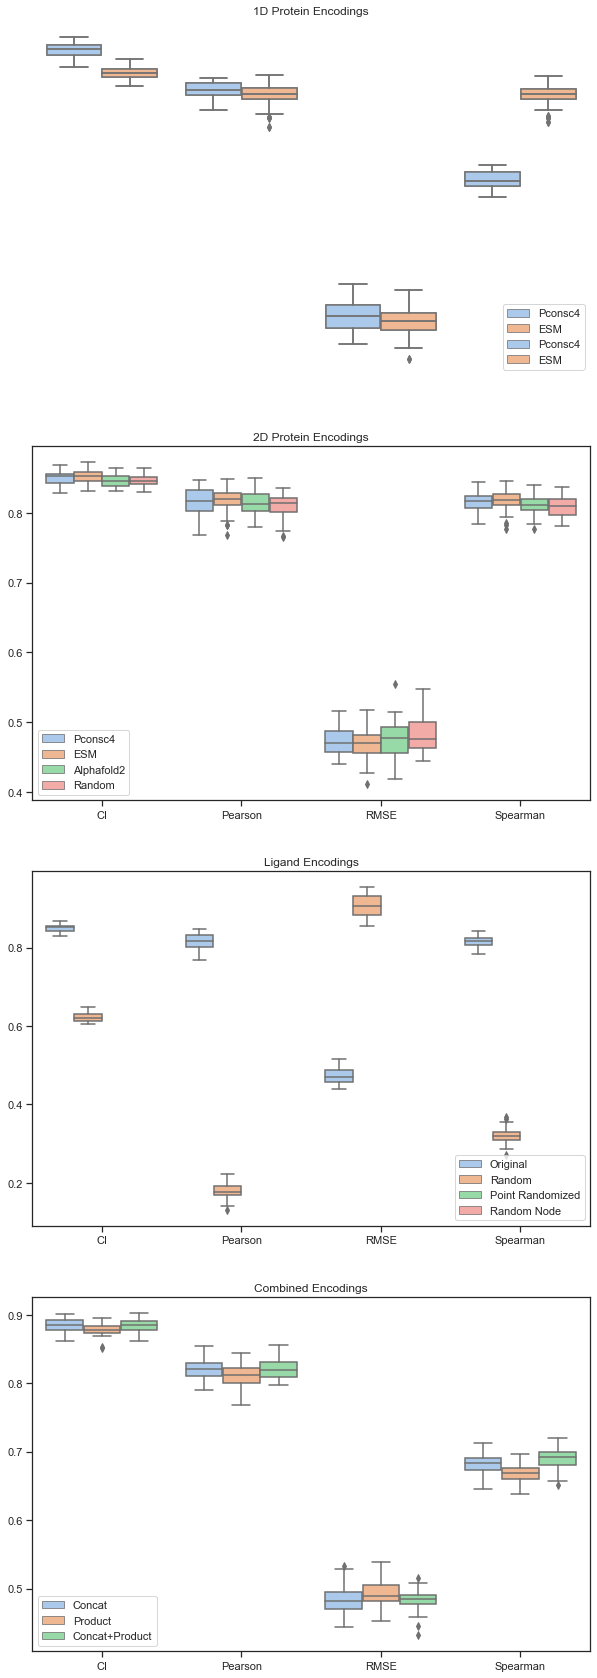

In [53]:
fig, axes = plt.subplots(4, 1, figsize=(10, 30))

# Define the order of the metrics
order = ["CI", "Pearson", "RMSE", "Spearman"]

# Define the color palette for the different encodings
encoding_palette = {"Pconsc4": "C0", "ESM": "C1", "Alphafold2": "C2", "Random": "C3"}

# KIBA Data
create_subtitle(fig, axes[0], 'KIBA')

# Boxplots for 1D protein encodings
sns.boxplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6,
            order=order, palette=["C0", "C1"], hue_order=["Pconsc4", "ESM"])
axes[0].set_title("1D Protein Encodings")
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].legend(loc='lower right')

# Boxplots for 2D protein encodings
sns.boxplot(ax=axes[1], x='variable', y='value', hue='cmap', data=df_melted1,
            order=order, palette=["C0", "C1", "C2", "C3"], hue_order=["Pconsc4", "ESM", "Alphafold2", "Random"])
axes[1].set_title("2D Protein Encodings")
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].legend(loc='lower left')

# Boxplots for ligand encodings
sns.boxplot(ax=axes[2], x='variable', y='value', hue='Encoding', data=df_melted2,
            order=order, palette=["C0", "C1", "C2", "C3"], hue_order=["Original", "Random", "Point Randomized", "Random Node"])
axes[2].set_title("Ligand Encodings")
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].legend(loc='lower right')

# Boxplots for combined encodings
sns.boxplot(ax=axes[3], x='variable', y='value', hue='Encoding', data=df_melted5,
            order=order, palette=["C0", "C1", "C2"], hue_order=["Concat", "Product", "Concat+Product"])
axes[3].set_title("Combined Encodings")
axes[3].set_xlabel('')
axes[3].set_ylabel('')
axes[3].legend(loc='lower left')

# Davis Data
create_subtitle(fig, axes[0], 'Davis')

# Boxplots for 1D protein encodings
sns.boxplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6,
            order=order, palette=["C0", "C1"], hue_order=["Pconsc4", "ESM"])
axes[0].set_title("1D Protein Encodings")
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].legend(loc='lower right')

# Boxplots for 2D protein encodings
# sns.boxplot(ax=axes[1], x='variable', y='value', hue='cmap', data=df_melted7,
#             order=order, palette=["C0",

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melted data frames for KIBA and Davis datasets
df_melted_KIBA = ...
df_melted_Davis = ...

# Define order and hue_order lists
order = ["CI", "Pearson", "RMSE", "Spearman"]
hue_order1 = ['Pconsc4', 'ESM']
hue_order2 = ['Pconsc4', 'ESM', 'Alphafold2', 'Random']
hue_order3 = ['Original', 'Random', 'Point Randomized', 'Random Node']
hue_order4 = ['Concat', 'Product', 'Concat+Product']

# Set up the plot
g = sns.catplot(x='variable', y='value', hue='Encoding', row='Data', col='cmap',
                data=pd.concat([df_melted_KIBA.assign(Data='KIBA'), 
                                df_melted_Davis.assign(Data='Davis')]),
                kind='box', height=5, aspect=1.5, order=order,
                hue_order=[hue_order1, hue_order2, hue_order3, hue_order4],
                palette=["C0", "C1", "C2", "C3"], legend=False)

# Add title and labels to the axes
g.fig.suptitle("Comparison of Protein-Ligand Encodings and Metrics between KIBA and Davis datasets", fontsize=20)
g.set_axis_labels("", "")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Add legend to the plot
g.fig.subplots_adjust(top=0.9, wspace=0.1, hspace=0.2)
g.add_legend(title="Encoding", fontsize=14, label_order=hue_order4)

# Show the plot
plt.show()


In [9]:
df_melted1['source'] = 'KIBA'
df_melted7['source'] = 'Davis'
combined_df = pd.concat([df_melted1, df_melted7])


In [12]:
combined_df

,cmap,variable,value,source
0,Pconsc4,CI,0.836616,KIBA
1,Pconsc4,CI,0.842262,KIBA
2,Pconsc4,CI,0.855547,KIBA
3,Pconsc4,CI,0.854010,KIBA
4,Pconsc4,CI,0.864884,KIBA
...,...,...,...,...
635,Random,Spearman,0.643250,Davis
636,Random,Spearman,0.620942,Davis
637,Random,Spearman,0.644333,Davis
638,Random,Spearman,0.637775,Davis


In [16]:
combined_df[combined_df['cmap']=='Pconsc4']

,cmap,variable,value,source
0,Pconsc4,CI,0.836616,KIBA
1,Pconsc4,CI,0.842262,KIBA
2,Pconsc4,CI,0.855547,KIBA
3,Pconsc4,CI,0.854010,KIBA
4,Pconsc4,CI,0.864884,KIBA
...,...,...,...,...
515,Pconsc4,Spearman,0.694371,Davis
516,Pconsc4,Spearman,0.689340,Davis
517,Pconsc4,Spearman,0.699251,Davis
518,Pconsc4,Spearman,0.681534,Davis


In [ ]:
sns.boxplot(ax=axes[0], x='variable', y='value', hue='Encoding', data=df_melted6, order=order, palette=["C0", "C1"], hue_order=hue_order1)


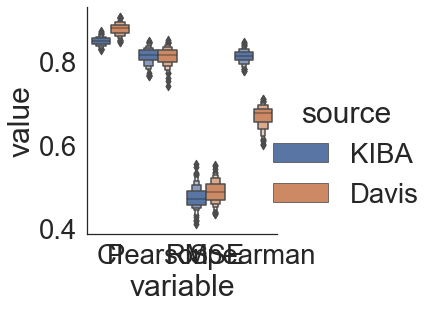

In [22]:
sns.catplot(data=combined_df, x="variable", y="value", hue="source", kind="boxen")

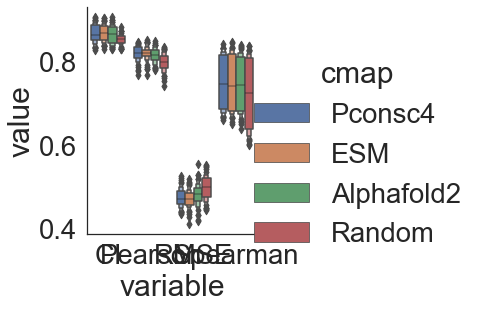

In [17]:
sns.catplot(data=combined_df, x="variable", y="value", hue="cmap", kind="boxen")

ValueError: Could not interpret input 'hue1'

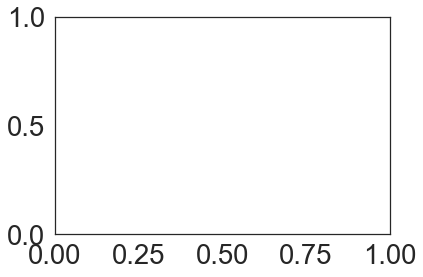

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some example data
data = sns.load_dataset('tips')

# Define the styles for each hue parameter
style_dict = {'hue1_value1': {'color': 'red', 'linestyle': '-'},
              'hue1_value2': {'color': 'blue', 'linestyle': '--'},
              'hue2_method1': {'color': 'green', 'linestyle': '-'},
              'hue2_method2': {'color': 'purple', 'linestyle': '--'}}

# Create the boxplot
fig, ax = plt.subplots()
sns.boxplot(x='day', y='total_bill', hue='hue1', data=data,
            boxprops=style_dict, whiskerprops=style_dict,
            capprops=style_dict, flierprops=style_dict,
            medianprops=style_dict)

# Add the second hue parameter
for patch in ax.artists:
    # Find the corresponding style for this box
    hue_val = patch.get_label()
    hue_style = style_dict[hue_val]
    # Set the patch properties
    patch.set_linestyle(hue_style['linestyle'])
    patch.set_edgecolor(hue_style['color'])

# Add the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center right')

plt.show()


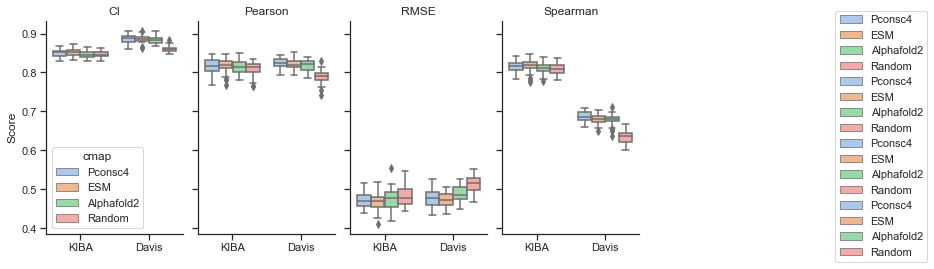

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a ctplot with boxplots
g = sns.catplot(
    data=data, kind="box",
    x="source", y="value", hue="cmap", col="variable",
    height=4, aspect=.7, 
    hue_order=cmap_order, col_order=metric_order, legend_out=False,
    dodge=True
)

# Adjust the plot labels
g.set_axis_labels("", "Score")
g.set_xticklabels(['KIBA', 'Davis'])
g.set_titles("{col_name}")

# Move the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
g.fig.legend(bbox_to_anchor=(1.1, 0.5), loc='center')

# Show the plot
plt.show()


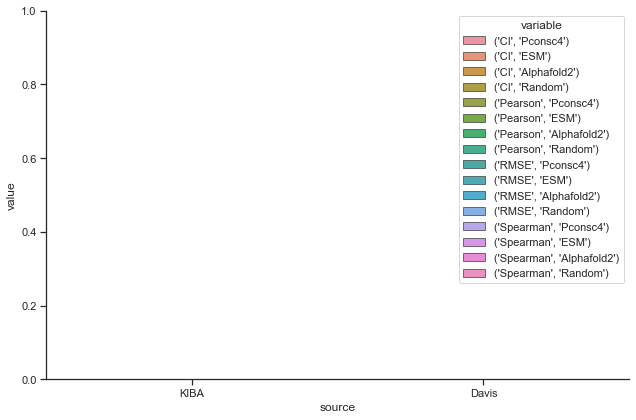

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4', 'ESM', 'Alphafold2', 'Random']
hue_order = [(m, c) for m in metric_order for c in cmap_order]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a ctplot with boxplots
g = sns.catplot(
    data=data, kind="box",
    x="source", y="value", hue="variable",
    height=6, aspect=1.5, 
    hue_order=hue_order, legend_out=False,
    dodge=True
)

# # Adjust the plot labels
# g.set_axis_labels("", "Score")
# g.set_xticklabels(['KIBA', 'Davis'])
# g._legend.set_title("")
# g.despine(left=True)

# # Set the legend
# for i, (m, c) in enumerate(hue_order):
#     g._legend.texts[i].set_text(f"{m} - {c}")

# # Show the plot
# plt.show()


/Users/rohan/opt/anaconda3/envs/mldd/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/Users/rohan/opt/anaconda3/envs/mldd/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/Users/rohan/opt/anaconda3/envs/mldd/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/Users/rohan/opt/anaconda3/envs/mldd/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


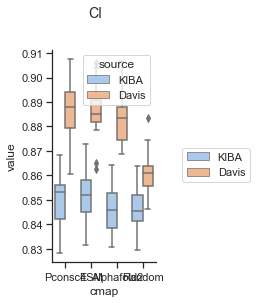

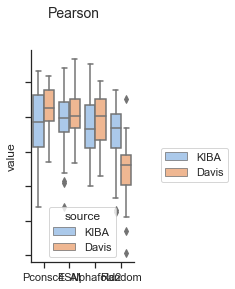

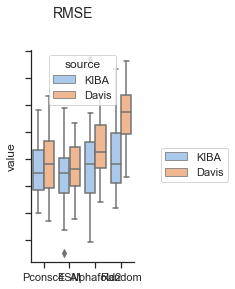

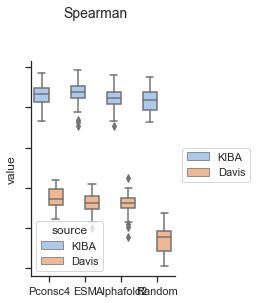

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create the plot with subplots
#fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15), sharey=True)

# Iterate over each metric and create a subplot
for i, metric in enumerate(metric_order):
    # Filter the data for the current metric
    metric_data = data[data["variable"] == metric]
    
    # Create a ctplot with boxplots
    g = sns.catplot(
        data=metric_data, kind="box",
        x="cmap", y="value", hue="source",
        height=4, aspect=.7, 
        hue_order=['KIBA', 'Davis'], order=cmap_order, legend_out=False,
        ax=axes[i]
    )

    # Set the plot title
    g.fig.suptitle(metric, y=1.05, fontsize=14)
    
    # Remove the plot labels except for the left-most plot
    if i != 0:
        g.set(yticklabels=[])
        g.set(xlabel=None)
    
    # Move the legend
    g.fig.subplots_adjust(top=0.9, right=0.8)
    g.fig.legend(bbox_to_anchor=(1.1, 0.5), loc='center')

# Adjust the plot spacing
plt.tight_layout()

# Show the plot
plt.show()


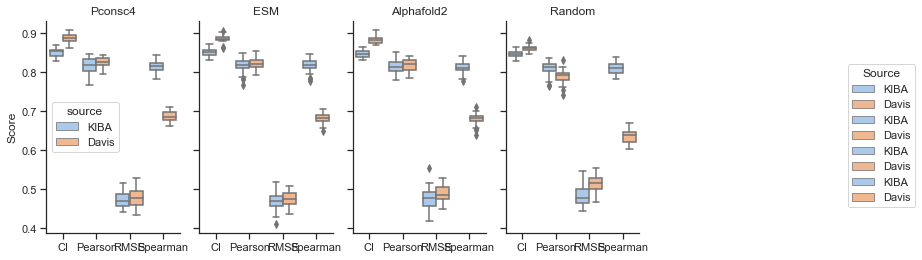

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a ctplot with boxplots
g = sns.catplot(
    data=data, kind="box",
    x="variable", y="value", hue="source", col="cmap",
    height=4, aspect=.7, 
    hue_order=hue_order, col_order=cmap_order, legend_out=False,
    dodge=True
)

# Adjust the plot labels
g.set_axis_labels("", "Score")
g.set_xticklabels(metric_order)
g.set_titles("{col_name}")

# Move the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
g.fig.legend(bbox_to_anchor=(1.1, 0.5), loc='center', title="Source")

# Show the plot
plt.show()


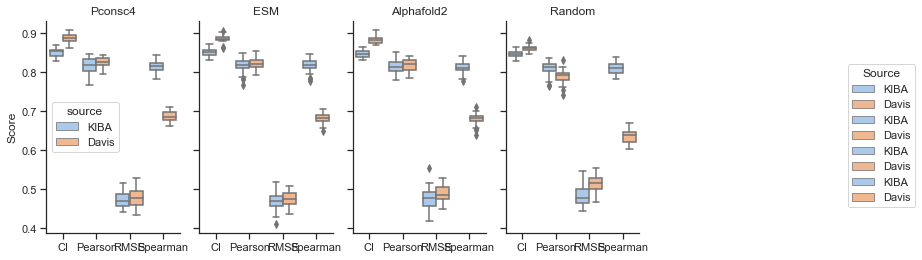

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a ctplot with boxplots
g = sns.catplot(
    data=data, kind="box",
    x="variable", y="value", hue="source", col="cmap",
    height=4, aspect=.7, 
    hue_order=hue_order, col_order=cmap_order, legend_out=False,
    dodge=True
)

# Adjust the plot labels
g.set_axis_labels("", "Score")
g.set_xticklabels(metric_order)
g.set_titles("{col_name}")

# Move the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
g.fig.legend(bbox_to_anchor=(1.1, 0.5), loc='center', title="Source")

# # Remove the extra subplots and merge the boxplots
# for ax in g.axes.flat:
#     if ax.get_title() not in cmap_order:
#         g._remove_axis(ax)
#     else:
#         ax.set_title(ax.get_title()[4:])
#     ax.set_xlabel('')

# # Show the plot
# plt.show()


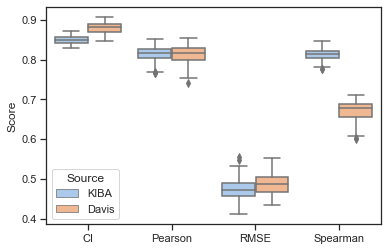

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="source",
    hue_order=hue_order, order=metric_order,
    dodge=True
)

# Adjust the plot labels
g.set_xlabel("")
g.set_ylabel("Score")
g.set_xticklabels(metric_order)

# Move the legend
g.legend(title="Source")

# Show the plot
plt.show()


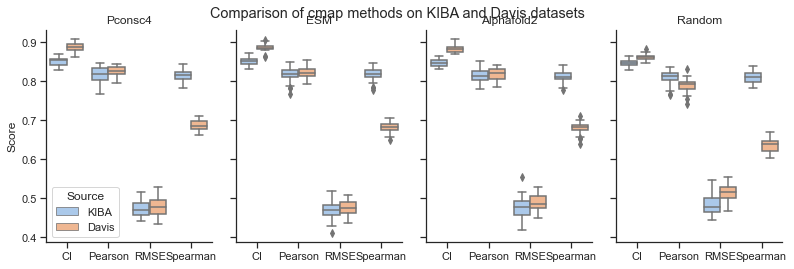

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a ctplot with boxplots
g = sns.catplot(
    data=data, kind="box",
    x="variable", y="value", hue="source", col="cmap",
    height=4, aspect=.7, 
    hue_order=hue_order, col_order=cmap_order, legend_out=False,
    dodge=True
)

# Adjust the plot labels
g.set_axis_labels("", "Score")
g.set_xticklabels(metric_order)
g.set_titles("{col_name}")

# Flatten the plot
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Comparison of cmap methods on KIBA and Davis datasets")

# Move the legend
g.add_legend(title="Source")

# Show the plot
plt.show()


/Users/rohan/opt/anaconda3/envs/mldd/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


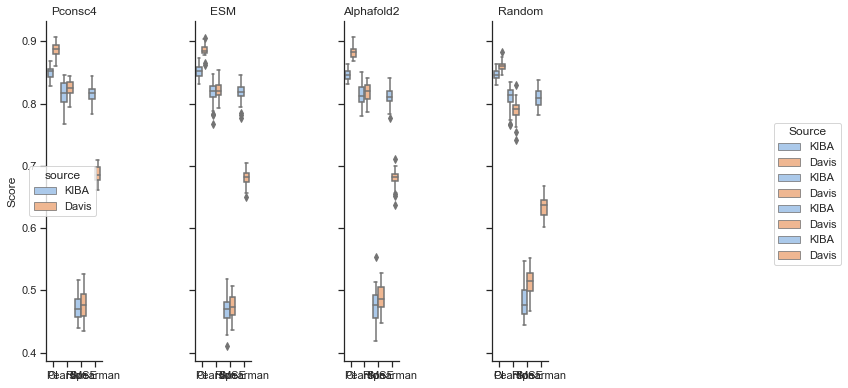

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a ctplot with boxplots
g = sns.catplot(
    data=data, kind="box",
    x="variable", y="value", hue="source", col="cmap",
    height=4, aspect=.15, 
    hue_order=hue_order, col_order=cmap_order, legend_out=False,
    dodge=True
)

# Adjust the plot labels
g.set_axis_labels("", "Score")
g.set_xticklabels(metric_order)
g.set_titles("{col_name}")

# Move the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
g.fig.legend(bbox_to_anchor=(1.1, 0.5), loc='center', title="Source")

# Set the plot size
g.fig.set_size_inches(12, 6)

# Show the plot
plt.show()


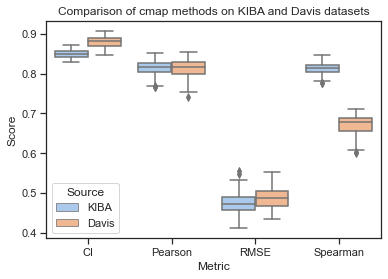

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot with all 32 boxplots
sns.boxplot(
    data=data, x="variable", y="value", hue="source",
    order=metric_order, hue_order=hue_order, dodge=True
)

# Adjust the plot labels
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Comparison of cmap methods on KIBA and Davis datasets")

# Move the legend
plt.legend(title="Source")

# Show the plot
plt.show()


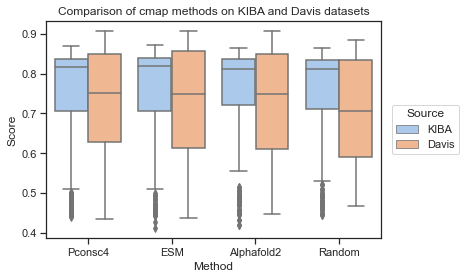

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="cmap", y="value", hue="source", order=cmap_order,
    hue_order=hue_order, dodge=True,
    palette=sns.color_palette("pastel", n_colors=len(hue_order))
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Method")
g.set_ylabel("Score")

# Set the title
g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Set the xticklabels
g.set_xticklabels(cmap_order)

# Show the plot
plt.show()


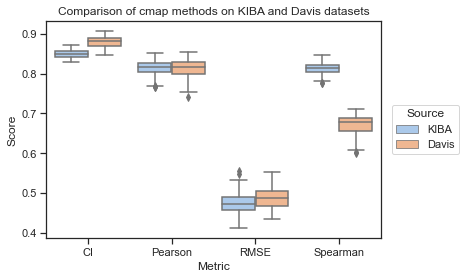

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="source", order=metric_order,
    hue_order=hue_order, dodge=True,
    palette=sns.color_palette("pastel", n_colors=len(hue_order)*len(cmap_order))
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Set the title
g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Set the xticklabels
g.set_xticklabels(metric_order)

# Show the plot
plt.show()


<AxesSubplot:xlabel='variable', ylabel='value'>

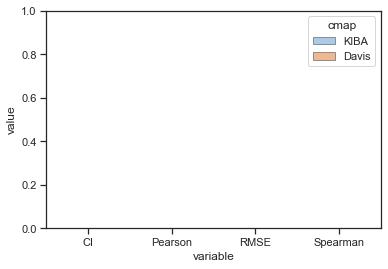

In [47]:
sns.boxplot(
    data=data, x="variable", y="value", hue="cmap", order=metric_order,
    hue_order=hue_order, dodge=True,
    palette=sns.color_palette("pastel", n_colors=len(hue_order)*len(cmap_order))
)

In [46]:
combined_df

,cmap,variable,value,source
0,Pconsc4,CI,0.836616,KIBA
1,Pconsc4,CI,0.842262,KIBA
2,Pconsc4,CI,0.855547,KIBA
3,Pconsc4,CI,0.854010,KIBA
4,Pconsc4,CI,0.864884,KIBA
...,...,...,...,...
635,Random,Spearman,0.643250,Davis
636,Random,Spearman,0.620942,Davis
637,Random,Spearman,0.644333,Davis
638,Random,Spearman,0.637775,Davis


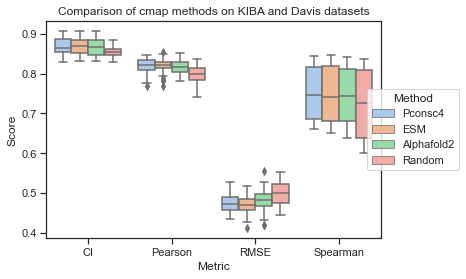

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="cmap", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=sns.color_palette("pastel", n_colors=len(cmap_order))
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), title="Method")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Set the title
g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Set the xticklabels
g.set_xticklabels(metric_order)

# Show the plot
plt.show()


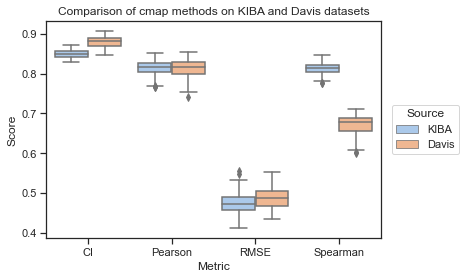

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4','ESM','Alphafold2','Random']
hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="source", order=metric_order,
    hue_order=hue_order, dodge=True,
    palette=sns.color_palette("pastel", n_colors=len(hue_order)*len(cmap_order))
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Set the title
g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Set the xticklabels
g.set_xticklabels(metric_order)

# Show the plot
plt.show()


In [24]:
combined_df.to_csv('combined_df.csv', sep='\t')

In [25]:
combined_df.to_csv('combined_df1.csv', sep='\t', encoding='utf-8', header='true')

In [26]:
combined_df

,cmap,variable,value,source
0,Pconsc4,CI,0.836616,KIBA
1,Pconsc4,CI,0.842262,KIBA
2,Pconsc4,CI,0.855547,KIBA
3,Pconsc4,CI,0.854010,KIBA
4,Pconsc4,CI,0.864884,KIBA
...,...,...,...,...
635,Random,Spearman,0.643250,Davis
636,Random,Spearman,0.620942,Davis
637,Random,Spearman,0.644333,Davis
638,Random,Spearman,0.637775,Davis


In [27]:

# Using apply() method to combine two columns of text
combined_df["Methods"] = combined_df[["cmap", "source"]].apply("_".join, axis=1)
print(combined_df)


        cmap  variable     value source       Methods
0    Pconsc4        CI  0.836616   KIBA  Pconsc4_KIBA
1    Pconsc4        CI  0.842262   KIBA  Pconsc4_KIBA
2    Pconsc4        CI  0.855547   KIBA  Pconsc4_KIBA
3    Pconsc4        CI  0.854010   KIBA  Pconsc4_KIBA
4    Pconsc4        CI  0.864884   KIBA  Pconsc4_KIBA
..       ...       ...       ...    ...           ...
635   Random  Spearman  0.643250  Davis  Random_Davis
636   Random  Spearman  0.620942  Davis  Random_Davis
637   Random  Spearman  0.644333  Davis  Random_Davis
638   Random  Spearman  0.637775  Davis  Random_Davis
639   Random  Spearman  0.627869  Davis  Random_Davis

[1280 rows x 5 columns]


<AxesSubplot:xlabel='variable', ylabel='value'>

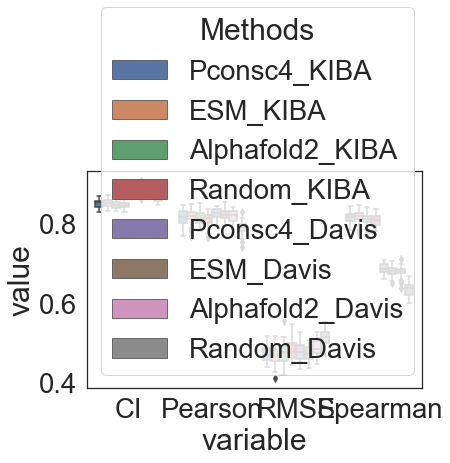

In [29]:
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
sns.boxplot(
    data=combined_df, x="variable", y="value", hue="Methods",
    order=metric_order, dodge=True
)

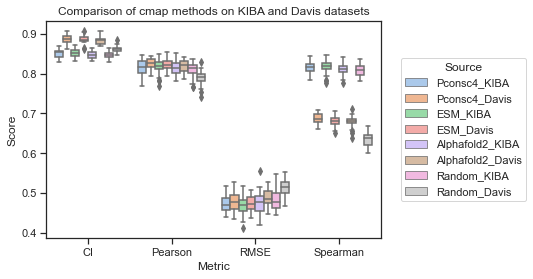

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4_KIBA','Pconsc4_Davis','ESM_KIBA','ESM_Davis','Alphafold2_KIBA','Alphafold2_Davis','Random_KIBA','Random_Davis']
#hue_order = ["KIBA", "Davis"]

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="Methods", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=sns.color_palette("pastel")
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Set the title
g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Set the xticklabels
g.set_xticklabels(metric_order)

# Show the plot
plt.show()


AttributeError: 'PathPatch' object has no property 'notch'

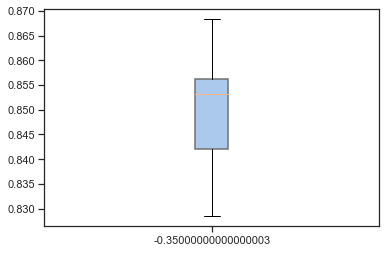

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4_KIBA','Pconsc4_Davis','ESM_KIBA','ESM_Davis','Alphafold2_KIBA','Alphafold2_Davis','Random_KIBA','Random_Davis']

# Define the notches for each group
notch_dict = {'Pconsc4_KIBA': True,
              'ESM_KIBA': True,
              'ESM_Davis': False,
              'Pconsc4_Davis': False,
              'Alphafold2_KIBA': True,
              'Alphafold2_Davis': False,
              'Random_KIBA': True,
              'Random_Davis': False}

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="Methods", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=sns.color_palette("pastel"), boxprops={"notch": [notch_dict[m] for m in cmap_order]}
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Set the title
g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Set the xticklabels
g.set_xticklabels(metric_order)

# Show the plot
plt.show()


AttributeError: 'PathPatch' object has no property 'notch'

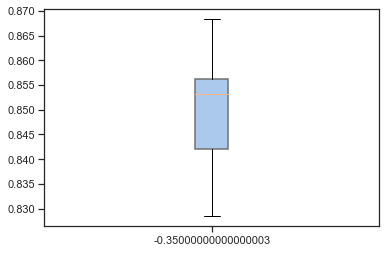

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4_KIBA','Pconsc4_Davis','ESM_KIBA','ESM_Davis','Alphafold2_KIBA','Alphafold2_Davis','Random_KIBA','Random_Davis']

# Define a dictionary to specify the notch for each boxplot
notch_dict = {
    "Pconsc4_KIBA": True,
    "Pconsc4_Davis": True,
    "ESM_KIBA": True,
    "ESM_Davis": False,
    "Alphafold2_KIBA": True,
    "Alphafold2_Davis": True,
    "Random_KIBA": True,
    "Random_Davis": True
}

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="Methods", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=sns.color_palette("pastel"),
    boxprops={"notch": [notch_dict[m] for m in cmap_order]}
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Set the title
g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Set the xticklabels
g.set_xticklabels(metric_order)

# Show the plot
plt.show()


In [89]:
sns.set(font_scale = 2.5,style="white")

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

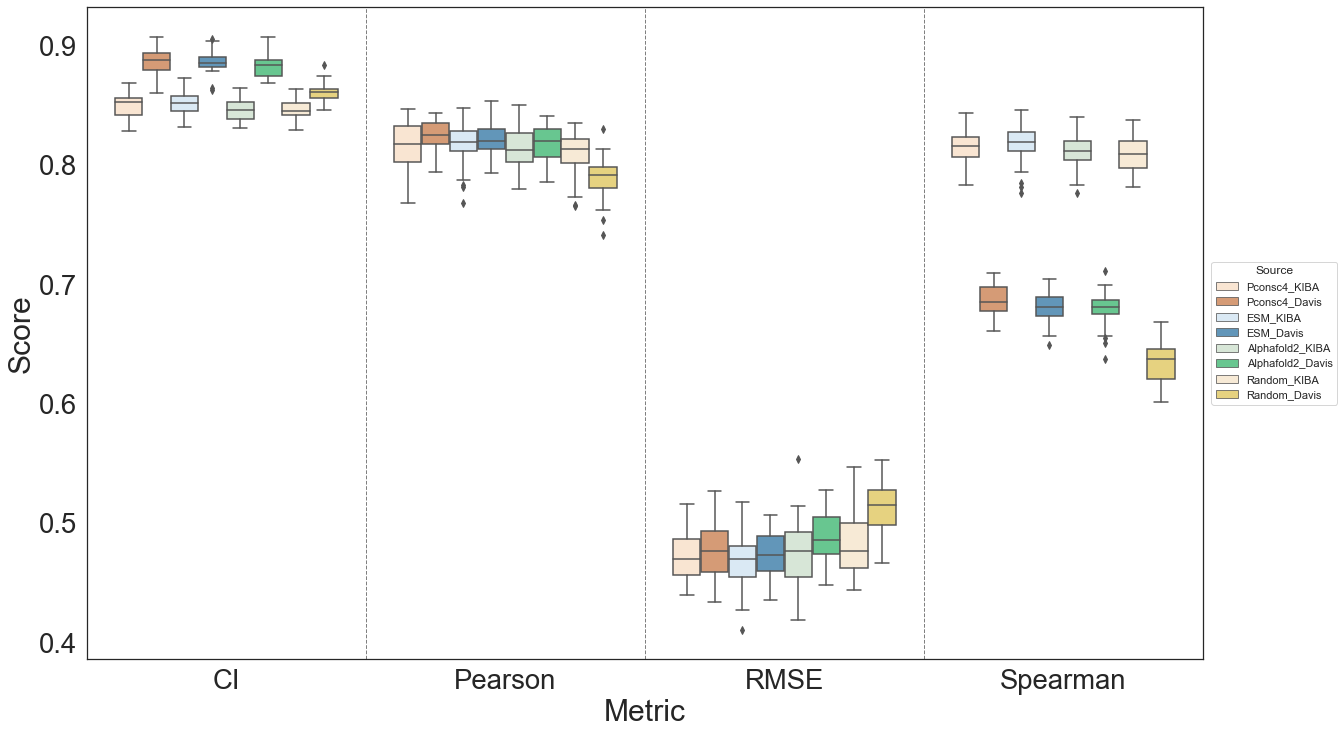

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4_KIBA','Pconsc4_Davis','ESM_KIBA','ESM_Davis','Alphafold2_KIBA','Alphafold2_Davis','Random_KIBA','Random_Davis']
colors=['#FFE5CC','#E59866','#D6EAF8','#5499C7','#D5E8D4','#58D68D','#FDEBD0','#F7DC6F']
# Set the style of the plot
sns.set(style="ticks", palette="pastel")
sns.set(font_scale = 2.5,style="white")
# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="Methods", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=colors
)
#sns.color_palette("pastel")

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.125, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='gray', linestyle='--', linewidth=1)

# Add a shadow effect after every two boxes
# box_colors = []
# for i in range(len(metric_order)):
#     if i % 2 == 0:
#         box_colors.append(['white', 'lightgray'])
#     else:
#         box_colors.append(['lightgray', 'white'])
# for i, artist in enumerate(g.artists):
#     # Set the box colors
#     artist.set_facecolor(box_colors[i % len(box_colors)][0])
#     artist.set_edgecolor('black')
#     artist.set_linewidth(1)
#     # Set the shadow effect
#     artist.set_path_effects([pe.patheffects.SimplePatchShadow(offset=(1, -1), alpha=0.2, shadow_color=box_colors[i % len(box_colors)][1])])



# # Use shadow effect on every second boxplot
# for i, artist in enumerate(ax.artists):
#     if i % 2 == 1:
#         artist.set_edgecolor('lightgray')
#         artist.set_facecolor('white')
#         artist.set_linewidth(0.5)
#         shadow = mpl.patheffects.withSimplePatchShadow((1, -1), shadow_rgbFace='gray', alpha=0.5)
#         artist.set_path_effects([shadow])

# # Set the title
# g.set_title("Comparison of cmap methods on KIBA and Davis datasets")

# Define the spacing between boxes
spacing = 0.2

# Get the x-axis tick positions
tick_positions = g.get_xticks()

# # Add space after every two boxes
# new_tick_positions = []
# for i in range(len(metric_order)):
#     if i % 2 == 0:
#         new_tick_positions.append(tick_positions[i])
#     else:
#         new_tick_positions.append(tick_positions[i] + spacing)

# # Set the new tick positions
# g.set_xticks(new_tick_positions)

# # Add labels for every two boxes
# labels = ["KIBA", "KIBA", "Davis", "Davis"]
# label_positions = [tick_positions[i] + spacing / 2 for i in range(len(metric_order))]
# g.set_xticklabels(labels, rotation=0, ha="center")

# Show the plot
plt.show()

# fig.savefig(os.path.join('results_plots',  'Fig4_1' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'Fig4_1' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'Fig4_1' + '.svg'), dpi=500, bbox_inches='tight')



In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np

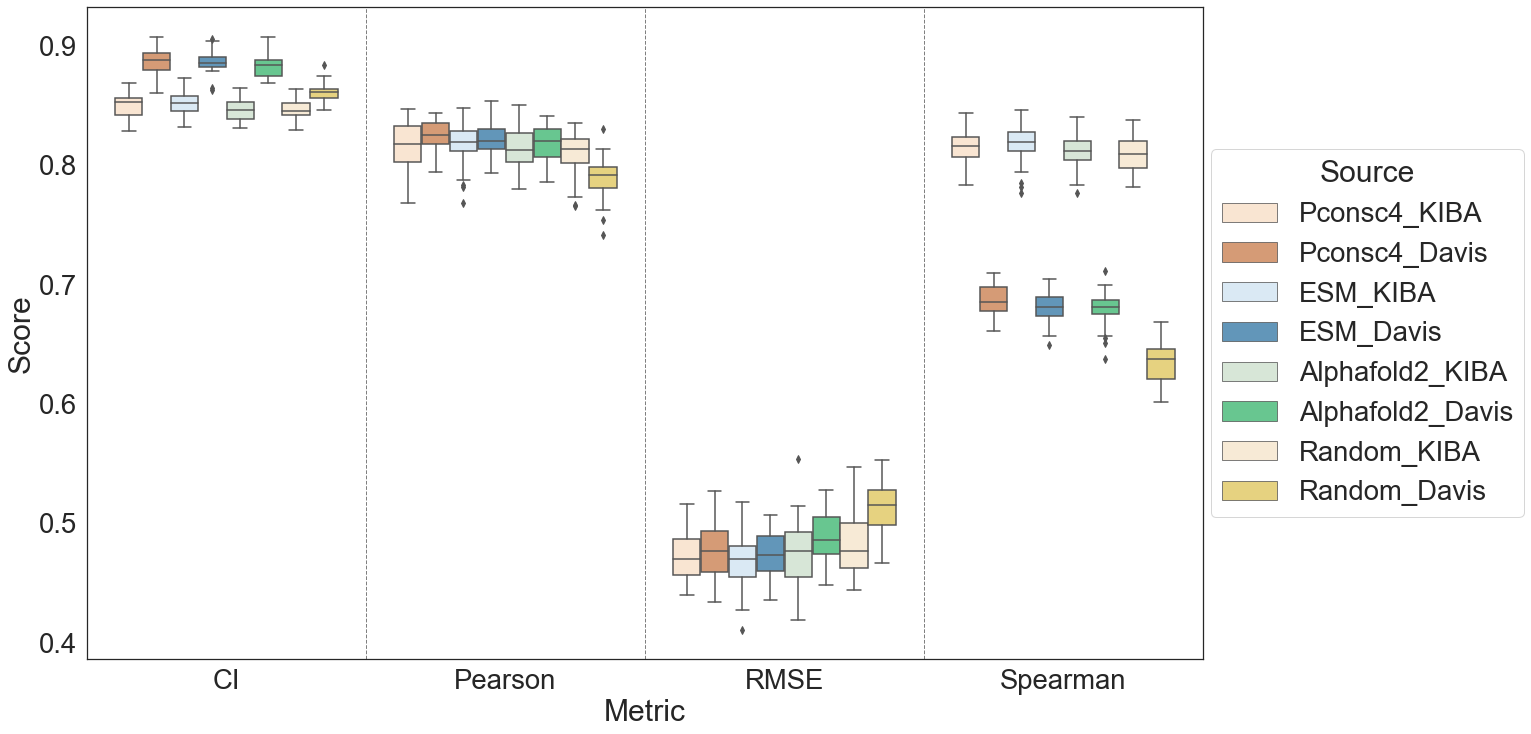

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4_KIBA','Pconsc4_Davis','ESM_KIBA','ESM_Davis','Alphafold2_KIBA','Alphafold2_Davis','Random_KIBA','Random_Davis']
colors=['#FFE5CC','#E59866','#D6EAF8','#5499C7','#D5E8D4','#58D68D','#FDEBD0','#F7DC6F']

# Set the style of the plot
sns.set(style="ticks", palette="pastel")
sns.set(font_scale = 2.5,style="white")
# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="Methods", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=colors
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='gray', linestyle='--', linewidth=1)






# Show the plot
plt.show()


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4_KIBA','Pconsc4_Davis','ESM_KIBA','ESM_Davis','Alphafold2_KIBA','Alphafold2_Davis','Random_KIBA','Random_Davis']
colors=['#FFE5CC','#E59866','#D6EAF8','#5499C7','#D5E8D4','#58D68D','#FDEBD0','#F7DC6F']

# Set the style of the plot
sns.set(style="ticks", palette="pastel")
sns.set(font_scale = 2.5,style="white")
# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="Methods", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=colors
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='gray', linestyle='--', linewidth=1)

# Add a shadow effect after every two boxes
box_colors = []
for i in range(len(metric_order)):
    if i % 2 == 0:
        box_colors.append(['white', 'lightgray'])
    else:
        box_colors.append(['lightgray', 'white'])

for i, artist in enumerate(g.artists):
    # Set the box colors
    artist.set_facecolor(box_colors[i % len(box_colors)][0])
    artist.set_edgecolor('black')
    artist.set_linewidth(1)
    
    # Set the shadow effect
    shadow = pe.SimplePatchShadow(offset=(1, -1), alpha=0.2, facecolor='gray')
    artist.set_path_effects([shadow])

# Show the plot
plt.show()


AttributeError: Unknown property facecolor

<Figure size 1440x864 with 1 Axes>

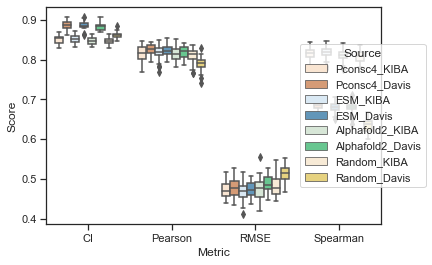

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataset
data = combined_df

# Define the order of the metrics and methods
metric_order = ["CI", "Pearson", "RMSE", "Spearman"]
cmap_order = ['Pconsc4_KIBA','Pconsc4_Davis','ESM_KIBA','ESM_Davis','Alphafold2_KIBA','Alphafold2_Davis','Random_KIBA','Random_Davis']
colors=['#FFE5CC','#E59866','#D6EAF8','#5499C7','#D5E8D4','#58D68D','#FDEBD0','#F7DC6F']

# Set the style of the plot
sns.set(style="ticks", palette="pastel")

# Create a boxplot
g = sns.boxplot(
    data=data, x="variable", y="value", hue="Methods", order=metric_order,
    hue_order=cmap_order, dodge=True,
    palette=colors
)

# Set the legend
g.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), title="Source")

# Set the axis labels
g.set_xlabel("Metric")
g.set_ylabel("Score")

# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='gray', linestyle='--', linewidth=1)

# Show the plot
plt.show()


In [39]:
combined_df.to_csv('combined_df2.csv', sep='\t', encoding='utf-8', header='true')